<a href="https://colab.research.google.com/github/widyadaridhyp/Youtube-Statistics/blob/main/YouTube_video_prediction_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**YouTube video prediction**



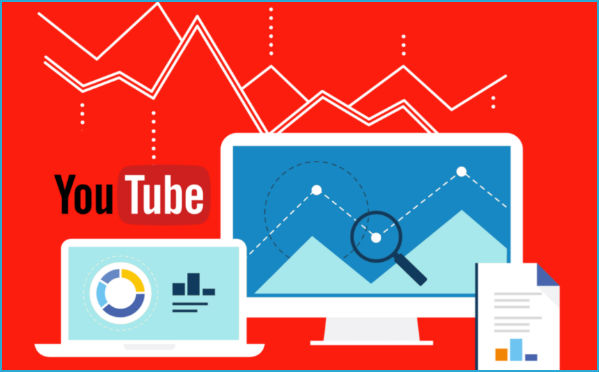

source: https://images.app.goo.gl/HsXjbj1WK8Lj9cTy7

# **Background**
1. Peran yang Akan Dijalankan:
Sebagai seorang data scientist, tim menggunakan model regresi linier untuk membantu kreator konten YouTube dalam memprediksi jumlah views yang akan diterima oleh video mereka. Melakukan analisis data dan mengidentifikasi faktor-faktor apa saja yang mempengaruhi jumlah views video.

2. Problem Statement: Banyak kreator yang mengunggah konten di YouTube, namun hanya beberapa video yang berhasil mendapatkan views dalam jumlah besar. Bagaimana kita dapat meningkatkan jumlah views pada video YouTube dengan memahami faktor-faktor yang mempengaruhi popularitas video?

3. Goals: Meningkatkan jumlah views pada video YouTube.

4. Objective:

* Membangun model prediktif menggunakan regresi linier untuk memprediksi jumlah views yang akan diterima oleh sebuah video berdasarkan berbagai fitur seperti judul, deskripsi, kategori, tags, waktu publikasi, dan lain-lain.

* Mengidentifikasi dan memahami perilaku pengguna yang paling berpengaruh terhadap jumlah views, serta memberikan rekomendasi berbasis data untuk meningkatkan popularitas video.

5. Evaluation Metrics:
* Root Mean Squared Error (RMSE): Mengukur seberapa jauh prediksi model dari nilai sebenarnya dalam satuan views.
* R-squared (R²): Menunjukkan seberapa baik model menjelaskan variabilitas data views.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Exploratory Data Analysis (EDA)**

In [2]:
df=pd.read_excel('https://raw.githubusercontent.com/widyadaridhyp/Youtube-Statistics/main/youtube_statistics.xlsx')
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


Definisi masing-ma

Definisi masing-masing kolom: <br>
● trending_date: tanggal ketika video trending <br>
● title: judul video <br>
● channel_title: nama channel <br>
● category_id: kategori video dalam label encoding <br>
● publish_time: waktu publish video <br>
● tags: tag yang digunakan pada video <br>
● views: jumlah views video <br>
● likes: jumlah likes video <br>
● dislikes: jumlah dislikes video <br>
● comment_count: jumlah komentar pada video <br>
● comments_disabled: apakah status komentar dinonaktifkan pada video <br>
● ratings_disabled: apakah rating dinonaktifkan pada video <br>
● video_error_or_removed: apakah video error atau sudah dihapus saat ini <br>
● description: deskripsi video <br>
● No_tags: jumlah tags yang digunakan <br>
● desc_len: panjang kata deskripsi video <br>
● len_title: panjang kata judul video <br>
● publish_date: tanggal publish video <br>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [4]:
df.nunique()

trending_date               205
title                     16431
channel_title              1390
category_id                  17
publish_time              12375
tags                      12463
views                     31638
likes                     15473
dislikes                   5072
comment_count              6024
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description               13979
No_tags                      66
desc_len                   2850
len_title                    91
publish_date                219
dtype: int64

## Checking Missing Values

In [5]:
df.isna().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

In [6]:
(45/36791)*100

0.12231252208420537

Terdapat missing value pada fitur description. Namun hanya berbobot 0.122%

## Checking Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

**Insight:**

* trending_date dan publish_time seharusnya datetime
* comment_count, comments_disabled, dan ratings_disabled dapat berupa data biner
* data numeric: views, likes, dislikes, comment_count, no_tags, desc_len, dan len_title
* data text: title, channel_title, tags, description

## Checking Outliers

In [8]:
# Mengubah semua nama kolom menjadi huruf kecil
df.columns = df.columns.str.lower()

In [9]:
text=['title','channel_title','tags','description']
cat = ['trending_date', 'publish_time', 'category_id']
num = ['views','likes','dislikes','comment_count','no_tags','desc_len','len_title']

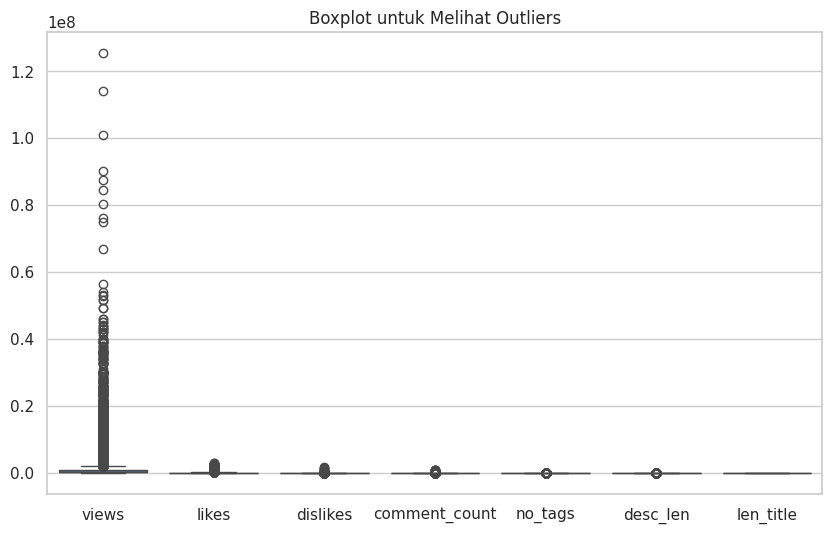

In [10]:
sns.set(style="whitegrid")

# Membuat boxplot dengan seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num])
plt.title('Boxplot untuk Melihat Outliers')
plt.show()

**Insight:**
Terdapat outliers pada views, likes, dislikes, comment_count, dislikes, comment_count, no_tags, dan desc_len dengan detail di bawah ini

Deskripsi Statistik dari feature numerik.

In [11]:
df[num].describe()

,views,likes,dislikes,comment_count,no_tags,desc_len,len_title
count,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361
std,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174
min,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000
50%,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000
max,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


### Detail Outliers

In [12]:
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

In [13]:
outliers_views = detect_outliers(df['views'])
outliers_likes = detect_outliers(df['likes'])
outliers_dislikes = detect_outliers(df['dislikes'])
outliers_comment_count = detect_outliers(df['comment_count'])
outliers_no_tags = detect_outliers(df['no_tags'])
outliers_des_len = detect_outliers(df['desc_len'])

In [14]:
df[outliers_views]

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,no_tags,desc_len,len_title,publish_date
5,2017-11-14,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,04:29:50,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,False,False,False,Watch MCA- Middle Class Abbayi First Look Teas...,22,449,91,2017-11-10
6,2017-11-14,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,16:41:15,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...,18,1411,96,2017-11-11
7,2017-11-14,Padmavati : Ek Dil Ek Jaan Video Song | Deepik...,T-Series,10,06:14:19,"Ek Dil Ek Jaan Video Song|""'Ek Dil Ek Jaan'""|""...",10588371,132738,8812,10847,False,False,False,Presenting the song 'Ek Dil Ek Jaan' from Padm...,26,1299,96,2017-11-11
11,2017-11-14,Jannat (Full Song) Aatish - Latest Punjabi Son...,White Hill Music,10,12:02:09,"Aatish new punjabi song 2017|""latest punjabi s...",2348107,32834,710,1743,False,False,False,A WHITE HILL MUSIC Presentation\nProduced by :...,22,2093,83,2017-11-11
17,2017-11-14,Tiger Zinda Hai | Official Trailer | Salman Kh...,YRF,1,06:01:50,"Tiger Zinda Hai Trailer|""Tiger Zinda Hai Offic...",35885754,829362,61195,101117,False,False,False,Stay updated! 🔔 Subscribe Now: https://goo.gl/...,22,901,63,2017-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36749,2018-06-14,SIP SIP - Jasmine Sandlas ft Intense | (Full V...,Fresh Media Records,10,02:35:59,"Jasmine Sandlas Sip Sip|""Jasmine Sandlas New P...",3637277,81378,5069,4212,False,False,False,Singer - Jasmine SandlasSong - Sip SipLyrics/c...,7,292,79,2018-06-13
36751,2018-06-14,Town Hall 12 Update is Here! (Clash of Clans O...,Clash of Clans,20,12:08:03,"clash of clans|""COC""|""Clash of Clans Gameplay""...",10531608,122553,7011,10736,False,False,False,"Town Hall 12 is finally here, along with the E...",17,1762,54,2018-06-11
36752,2018-06-14,Sanju: Kar Har Maidaan Fateh | Ranbir Kapoor |...,T-Series,10,05:31:55,"Kar Har Maidaan Fateh|""kar har maidan fateh""|""...",19472216,309752,10303,21731,False,False,False,"In the darkest of moments, it’s often your fam...",24,4585,98,2018-06-10
36762,2018-06-14,Thanga Sela - Video Song | Kaala (Tamil) | Raj...,Wunderbar Studios,10,09:30:14,"Wunderbar Studios|""Wunderbar Films""|""Dhanush""|...",2368233,49279,2410,2297,False,False,False,Presenting the Official Video Song of Thanga S...,26,3264,98,2018-06-11


In [15]:
df[outliers_likes]

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,no_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
5,2017-11-14,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,04:29:50,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,False,False,False,Watch MCA- Middle Class Abbayi First Look Teas...,22,449,91,2017-11-10
6,2017-11-14,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,16:41:15,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...,18,1411,96,2017-11-11
7,2017-11-14,Padmavati : Ek Dil Ek Jaan Video Song | Deepik...,T-Series,10,06:14:19,"Ek Dil Ek Jaan Video Song|""'Ek Dil Ek Jaan'""|""...",10588371,132738,8812,10847,False,False,False,Presenting the song 'Ek Dil Ek Jaan' from Padm...,26,1299,96,2017-11-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36759,2018-06-14,YOU ARE UNIQUE - Sandeep Maheshwari I Hindi,Sandeep Maheshwari,22,10:53:15,"Latest|""Sandip""|""Maheswari""|""Inspirational""|""V...",566057,34724,458,3462,False,False,False,YOU are unique... nobody else is YOU.Sandeep M...,46,619,43,2018-06-12
36762,2018-06-14,Thanga Sela - Video Song | Kaala (Tamil) | Raj...,Wunderbar Studios,10,09:30:14,"Wunderbar Studios|""Wunderbar Films""|""Dhanush""|...",2368233,49279,2410,2297,False,False,False,Presenting the Official Video Song of Thanga S...,26,3264,98,2018-06-11
36763,2018-06-14,Dumbo Official Teaser Trailer,Disney Movie Trailers,1,07:00:00,"Disney|""Walt Disney Studios""|""Dumbo""|""Flying E...",4427381,96391,5508,12726,False,False,False,Watch the teaser trailer for Tim Burton’s all-...,24,1143,29,2018-06-13
36770,2018-06-14,Manju - Kahani Ek Bai Ki | Sanju Trailer Spoof...,Girliyapa,22,06:45:26,"the viral fever|""tvf""|""the timeliners""|""the sc...",1000490,52438,5557,2789,False,False,False,Very few stories of a Bai in our times are as ...,19,1970,58,2018-06-11


In [16]:
df[outliers_dislikes]

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,no_tags,desc_len,len_title,publish_date
5,2017-11-14,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,04:29:50,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,False,False,False,Watch MCA- Middle Class Abbayi First Look Teas...,22,449,91,2017-11-10
6,2017-11-14,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,16:41:15,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...,18,1411,96,2017-11-11
7,2017-11-14,Padmavati : Ek Dil Ek Jaan Video Song | Deepik...,T-Series,10,06:14:19,"Ek Dil Ek Jaan Video Song|""'Ek Dil Ek Jaan'""|""...",10588371,132738,8812,10847,False,False,False,Presenting the song 'Ek Dil Ek Jaan' from Padm...,26,1299,96,2017-11-11
17,2017-11-14,Tiger Zinda Hai | Official Trailer | Salman Kh...,YRF,1,06:01:50,"Tiger Zinda Hai Trailer|""Tiger Zinda Hai Offic...",35885754,829362,61195,101117,False,False,False,Stay updated! 🔔 Subscribe Now: https://goo.gl/...,22,901,63,2017-11-07
19,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97187,6146,12703,False,False,False,"One year after the presidential election, John...",4,630,62,2017-11-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36756,2018-06-14,RAMZAN IN INDIA (Eid Special) | Aashqeen,Aashqeen,23,11:42:38,"aashqeen|""aashqeen vines""|""aashqeen comedy""|""a...",784680,117155,3213,14132,False,False,False,Want to see ‘behind the scenes’ of Ramzan? Wan...,12,671,40,2018-06-12
36758,2018-06-14,What If PubG Was Made In India ?,Angry Prash,23,08:37:21,"pubg|""PlayerUnknown's Battlegrounds""|""pubg mob...",1214423,85601,4677,7628,False,False,False,This funny video is about what if players unkn...,13,441,32,2018-06-11
36763,2018-06-14,Dumbo Official Teaser Trailer,Disney Movie Trailers,1,07:00:00,"Disney|""Walt Disney Studios""|""Dumbo""|""Flying E...",4427381,96391,5508,12726,False,False,False,Watch the teaser trailer for Tim Burton’s all-...,24,1143,29,2018-06-13
36770,2018-06-14,Manju - Kahani Ek Bai Ki | Sanju Trailer Spoof...,Girliyapa,22,06:45:26,"the viral fever|""tvf""|""the timeliners""|""the sc...",1000490,52438,5557,2789,False,False,False,Very few stories of a Bai in our times are as ...,19,1970,58,2018-06-11


In [17]:
df[outliers_comment_count]

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,no_tags,desc_len,len_title,publish_date
5,2017-11-14,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,04:29:50,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,False,False,False,Watch MCA- Middle Class Abbayi First Look Teas...,22,449,91,2017-11-10
6,2017-11-14,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,16:41:15,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...,18,1411,96,2017-11-11
7,2017-11-14,Padmavati : Ek Dil Ek Jaan Video Song | Deepik...,T-Series,10,06:14:19,"Ek Dil Ek Jaan Video Song|""'Ek Dil Ek Jaan'""|""...",10588371,132738,8812,10847,False,False,False,Presenting the song 'Ek Dil Ek Jaan' from Padm...,26,1299,96,2017-11-11
17,2017-11-14,Tiger Zinda Hai | Official Trailer | Salman Kh...,YRF,1,06:01:50,"Tiger Zinda Hai Trailer|""Tiger Zinda Hai Offic...",35885754,829362,61195,101117,False,False,False,Stay updated! 🔔 Subscribe Now: https://goo.gl/...,22,901,63,2017-11-07
19,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97187,6146,12703,False,False,False,"One year after the presidential election, John...",4,630,62,2017-11-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36756,2018-06-14,RAMZAN IN INDIA (Eid Special) | Aashqeen,Aashqeen,23,11:42:38,"aashqeen|""aashqeen vines""|""aashqeen comedy""|""a...",784680,117155,3213,14132,False,False,False,Want to see ‘behind the scenes’ of Ramzan? Wan...,12,671,40,2018-06-12
36758,2018-06-14,What If PubG Was Made In India ?,Angry Prash,23,08:37:21,"pubg|""PlayerUnknown's Battlegrounds""|""pubg mob...",1214423,85601,4677,7628,False,False,False,This funny video is about what if players unkn...,13,441,32,2018-06-11
36759,2018-06-14,YOU ARE UNIQUE - Sandeep Maheshwari I Hindi,Sandeep Maheshwari,22,10:53:15,"Latest|""Sandip""|""Maheswari""|""Inspirational""|""V...",566057,34724,458,3462,False,False,False,YOU are unique... nobody else is YOU.Sandeep M...,46,619,43,2018-06-12
36763,2018-06-14,Dumbo Official Teaser Trailer,Disney Movie Trailers,1,07:00:00,"Disney|""Walt Disney Studios""|""Dumbo""|""Flying E...",4427381,96391,5508,12726,False,False,False,Watch the teaser trailer for Tim Burton’s all-...,24,1143,29,2018-06-13


In [18]:
df[outliers_des_len]

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,no_tags,desc_len,len_title,publish_date
52,2017-11-14,வாணி ராணி - VAANI RANI - Episode 1416 - 13/11...,RadaanMedia,24,16:30:01,"Vaani rani|""rani""|""Radhika in funny character""...",170707,1152,178,166,False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,14,3172,51,2017-11-13
56,2017-11-14,Baal Veer - बाल वीर - Episode 777 (Part 1) - 1...,Sony PAL,43,16:55:38,"superhero|""kid with superpowers""|""indian super...",433053,938,298,119,False,False,False,Subscribe to Sony Pal: http://www.youtube.com/...,29,3087,64,2017-11-11
108,2017-11-14,काला जादू करने वाले पर वापिस कैसे करें ।। How ...,Om Namoh Narayan,27,10:30:09,"Photo se Vashikaran|""Mobile ki photo se vashik...",69426,1112,125,0,True,False,False,काला जादू करने वाले पर वापिस कैसे करें ।। How ...,8,2577,92,2017-11-11
131,2017-11-14,Russia Vs Argentina 0-1 - All Goals & Highligh...,NugoBasilaiaa,17,14:55:25,Russia Vs Argentina 0-1 - All Goals & Highligh...,1641745,7643,702,1082,False,False,False,Russia Vs Argentina 0-1 - All Goals & Highligh...,16,2927,80,2017-11-11
139,2017-11-14,73 QUESTIONS W/ PRIYANKA CHOPRA | Vogue | Reac...,jaby koay,24,08:00:02,"73 questions with priyanka chopra|""priyanka ch...",158126,3477,136,435,False,False,False,Download the #StardustApp on Apple or Android ...,15,3103,59,2017-11-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36722,2018-06-14,13June 2018 करेंट अफेयर्स हिंदी//रटलेना//Daily...,Golden Era Education,27,22:20:21,"13 june 2018 current affairs|""Daily Current Af...",59328,2232,97,1296,False,False,False,TODAY PDF DOWNLOAD- https://www.goldeneraeduc...,24,4245,100,2018-06-12
36731,2018-06-14,Giant Slime Stress Relievers / 7 DIY Weird Str...,Troom Troom,26,19:00:02,"jokes with friends|""Stress Relievers""|""DIY""|""m...",1849399,21875,1703,2238,False,False,False,Subscribe Here: https://goo.gl/KM3Axw10 DIY Li...,23,3142,54,2018-06-12
36752,2018-06-14,Sanju: Kar Har Maidaan Fateh | Ranbir Kapoor |...,T-Series,10,05:31:55,"Kar Har Maidaan Fateh|""kar har maidan fateh""|""...",19472216,309752,10303,21731,False,False,False,"In the darkest of moments, it’s often your fam...",24,4585,98,2018-06-10
36762,2018-06-14,Thanga Sela - Video Song | Kaala (Tamil) | Raj...,Wunderbar Studios,10,09:30:14,"Wunderbar Studios|""Wunderbar Films""|""Dhanush""|...",2368233,49279,2410,2297,False,False,False,Presenting the Official Video Song of Thanga S...,26,3264,98,2018-06-11


In [19]:
df[outliers_no_tags]

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,no_tags,desc_len,len_title,publish_date
47,2017-11-14,13 November 2017-The Hindu Editorial News Pape...,Study IQ education,27,03:12:33,"november 2017 current affairs|""november""|""nove...",47352,2240,31,543,False,False,False,#childrenDay #Sale \n35% #Discount on Pendrive...,72,1751,89,2017-11-13
97,2017-11-14,FilterCopy | Types Of Men You Meet On A Date |...,FilterCopy,23,06:39:48,"irrfan|""khan""|""parvathy""|""QQS""|""Qarib Qarib Si...",1014724,25413,891,1030,False,False,False,We've all been on dates that we've repented. W...,45,1062,70,2017-11-09
187,2017-11-14,అమావాస్య ఉసిరిదీపం ఇలా వెలిగించండి chirravuri...,CHIRRAVURI FOUNDATION,22,05:02:21,"Chirravuri|""Foundation""|""telugu devotional""|""c...",23421,181,19,24,False,False,False,8885569579...CHIRRAVURI FOUNDATION.\n\n☛Subsct...,48,291,98,2017-11-13
251,2017-11-15,Alitho Saradaga | 13th November 2017 | Thagub...,etvteluguindia,24,17:15:38,"etvtelugu|""AlithoJollygaa""|""comedian""|""scenes""...",182089,918,94,79,False,False,False,Ali tho Kaasepu is a celebrity chat show with ...,46,403,95,2017-11-13
258,2017-11-15,14 November 2017-The Hindu Editorial News Pape...,Study IQ education,27,03:26:56,"november 2017 current affairs|""november""|""nove...",55663,2869,36,641,False,False,False,#childrenDay #Sale \n35% #Discount on Pendrive...,72,1751,89,2017-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36529,2018-06-13,12 June 2018 - The Hindu Editorial News Paper ...,Study IQ education,27,02:40:56,"current affairs 2018|""current affairs""|""curren...",59375,3646,82,345,False,False,False,#UPSC #SSC #IBPS #SBI #RBI #StatePSC #UGC #SSC...,52,172,88,2018-06-12
36582,2018-06-13,YOU ARE UNIQUE - Sandeep Maheshwari I Hindi,Sandeep Maheshwari,22,10:53:15,"Latest|""Sandip""|""Maheswari""|""Inspirational""|""V...",331405,25982,278,2684,False,False,False,YOU are unique... nobody else is YOU.Sandeep M...,46,619,43,2018-06-12
36638,2018-06-14,YOU ARE UNIQUE - Sandeep Maheshwari I Hindi,Sandeep Maheshwari,22,10:53:15,"Latest|""Sandip""|""Maheswari""|""Inspirational""|""V...",566057,34724,458,3462,False,False,False,YOU are unique... nobody else is YOU.Sandeep M...,46,619,43,2018-06-12
36682,2018-06-14,13 June 2018 - The Hindu Editorial News Paper ...,Study IQ education,27,02:42:50,"current affairs 2018|""current affairs""|""curren...",72227,4193,87,749,False,False,False,#UPSC #SSC #IBPS #SBI #RBI #StatePSC #UGC #SSC...,52,172,88,2018-06-13


## Skew Data

In [20]:
# Menghitung skewness untuk masing-masing kolom
skewness = df[num].skew()
skewness

views            11.999846
likes            10.897221
dislikes         74.258697
comment_count    27.077118
no_tags           0.636936
desc_len          1.869355
len_title        -0.453786
dtype: float64

**Insight:**
* **Skew kanan:** dislikes, comment_count, views, likes, desc_len, dan not_tags
* **Skew kiri:** len_titile
* Notes: Namun akan di analisis lebih lanjut untuk tretment dari fitur yang skew tersebut.

**Distribusi Normal Test**
* $H_0:$ tidak berdistirbusi normal
* $H_1:$ berdistirbusi normal

Titik Kritis:
$H_0$ di tolak jika $p_{value}> \alpha = 0.05$

In [21]:
from scipy.stats import shapiro

# Contoh pengujian normalitas menggunakan Shapiro-Wilk
for column in num:
    stat, p_value = shapiro(df[column])
    print(f'Feature {column}:')
    print(f'Statistic = {stat:.3f}, p-value = {p_value:.3f}')
    if p_value > 0.05:
        print(f'{column} berdistribusi normal')
    else:
        print(f'{column} tidak berdistribusi normal')
    print()

Feature views:
Statistic = 0.282, p-value = 0.000
views tidak berdistribusi normal

Feature likes:
Statistic = 0.266, p-value = 0.000
likes tidak berdistribusi normal

Feature dislikes:
Statistic = 0.041, p-value = 0.000
dislikes tidak berdistribusi normal

Feature comment_count:
Statistic = 0.132, p-value = 0.000
comment_count tidak berdistribusi normal

Feature no_tags:
Statistic = 0.974, p-value = 0.000
no_tags tidak berdistribusi normal

Feature desc_len:
Statistic = 0.828, p-value = 0.000
desc_len tidak berdistribusi normal

Feature len_title:
Statistic = 0.938, p-value = 0.000
len_title tidak berdistribusi normal



/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [22]:
df[text].describe()

,title,channel_title,tags,description
count,36791,36791,36791,36746
unique,16431,1390,12463,13979
top,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,[none],Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq,19,284,1120,166


In [23]:
df.trending_date.value_counts().head(20)

trending_date
2017-12-23    199
2017-12-22    198
2018-04-15    198
2018-05-05    198
2017-12-16    197
2017-12-13    197
2018-01-25    197
2018-01-20    196
2017-12-12    196
2018-03-03    196
2018-01-12    196
2018-01-13    196
2018-05-14    196
2017-12-01    196
2017-11-16    196
2017-11-19    196
2017-11-24    196
2018-03-17    196
2018-01-21    195
2018-01-24    195
Name: count, dtype: int64

In [24]:
df['year'] = df['publish_date'].dt.year
df['month'] = df['publish_date'].dt.month
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='counts')

In [25]:
average_monthly_counts = monthly_counts.groupby('year')['counts'].mean().reset_index(name='average_counts')

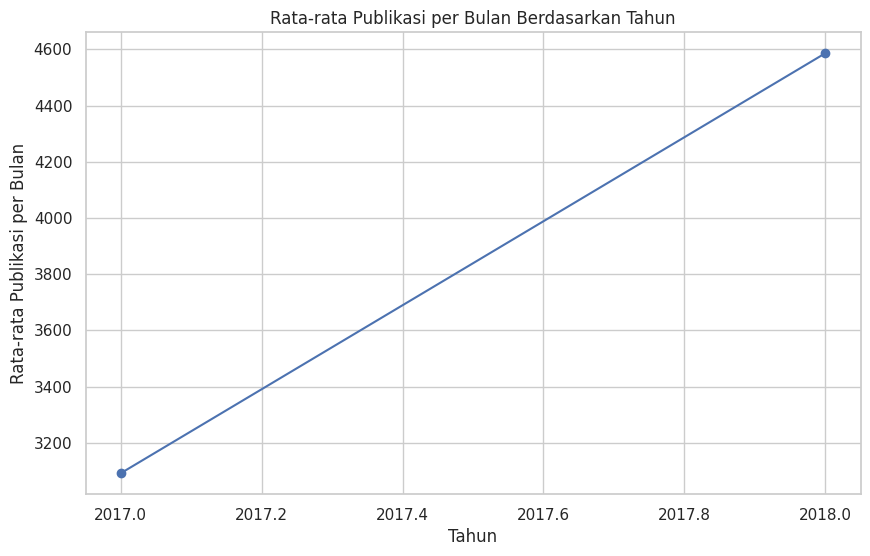

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(average_monthly_counts['year'], average_monthly_counts['average_counts'], marker='o')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Publikasi per Bulan')
plt.title('Rata-rata Publikasi per Bulan Berdasarkan Tahun')
plt.grid(True)
plt.show()

**Insight:**
Rata-rata publikasi perbulan terus meningkat dari tahun 2017 hingga 2018.

## Univariate Analysis

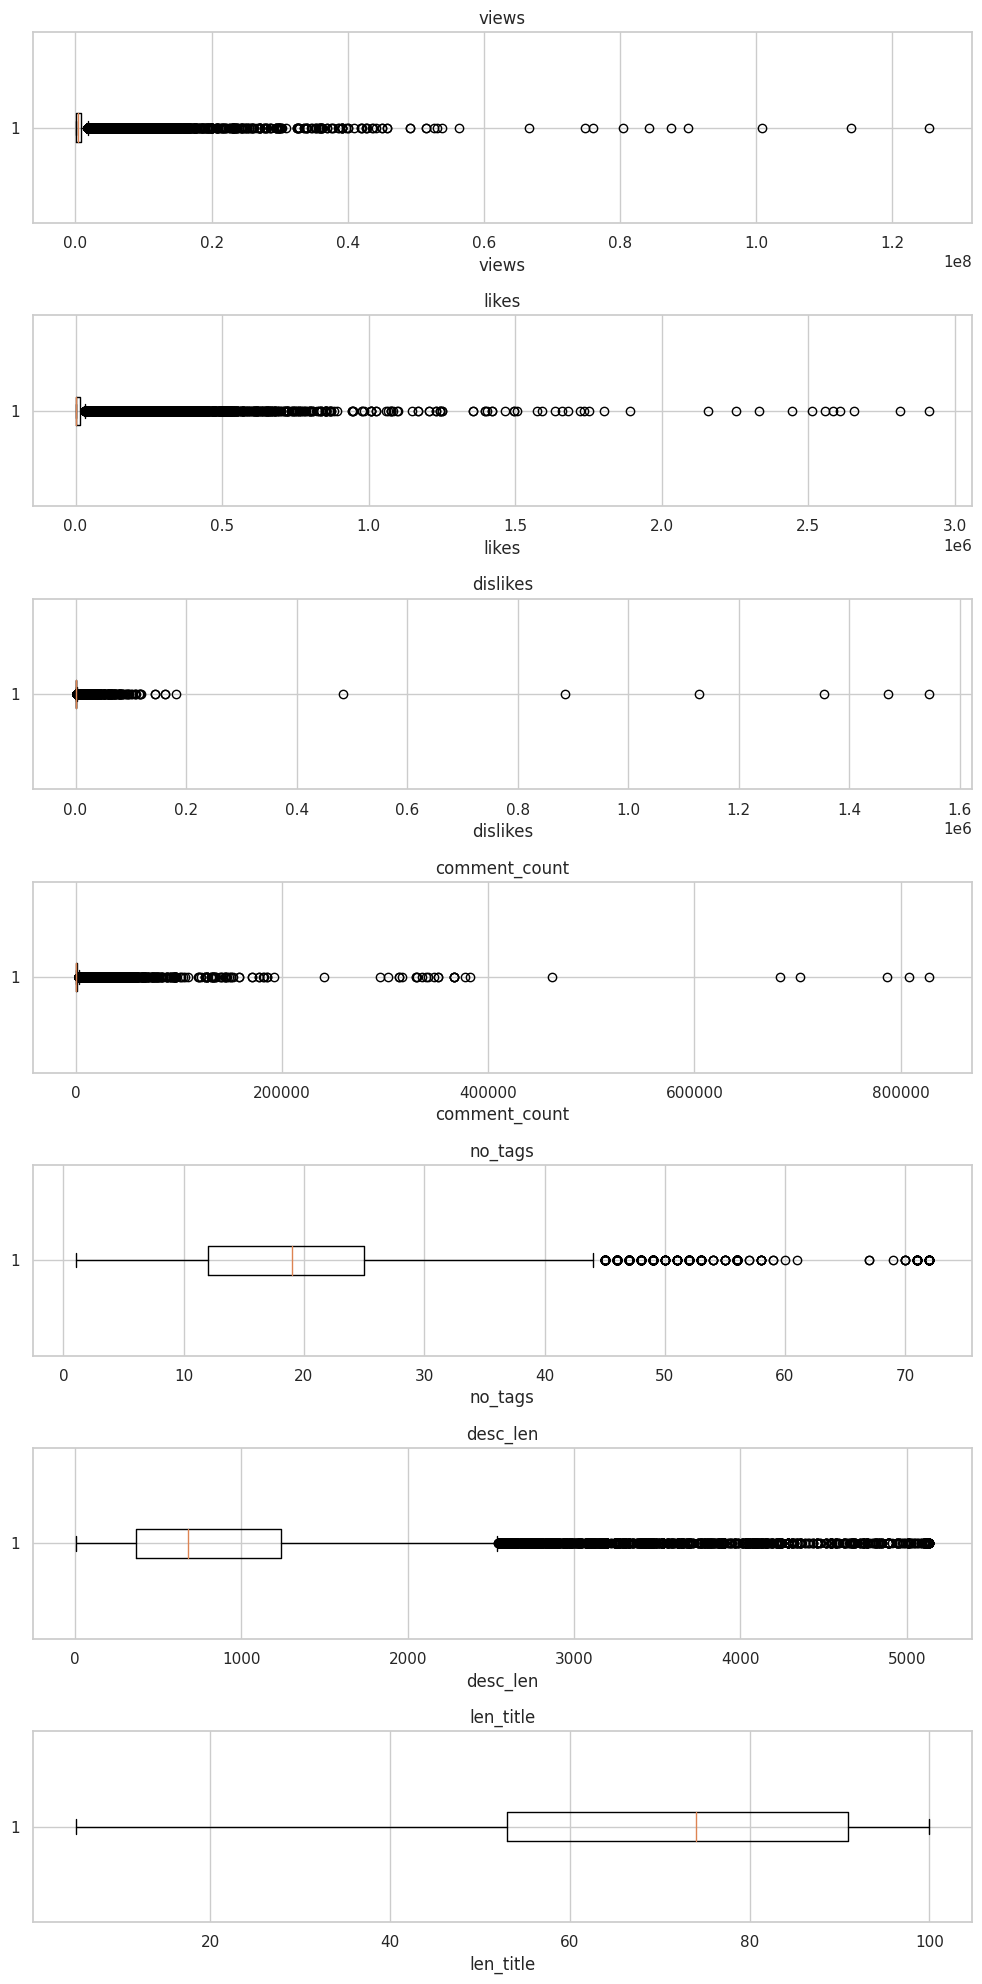

In [27]:
fig, axes = plt.subplots(nrows=len(num), ncols=1, figsize=(10, 20))

for i, col in enumerate(num):
    axes[i].boxplot(df[col], vert=False)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

Banyak data yang memiliki nilai maksimum di berbagai fitur numerik

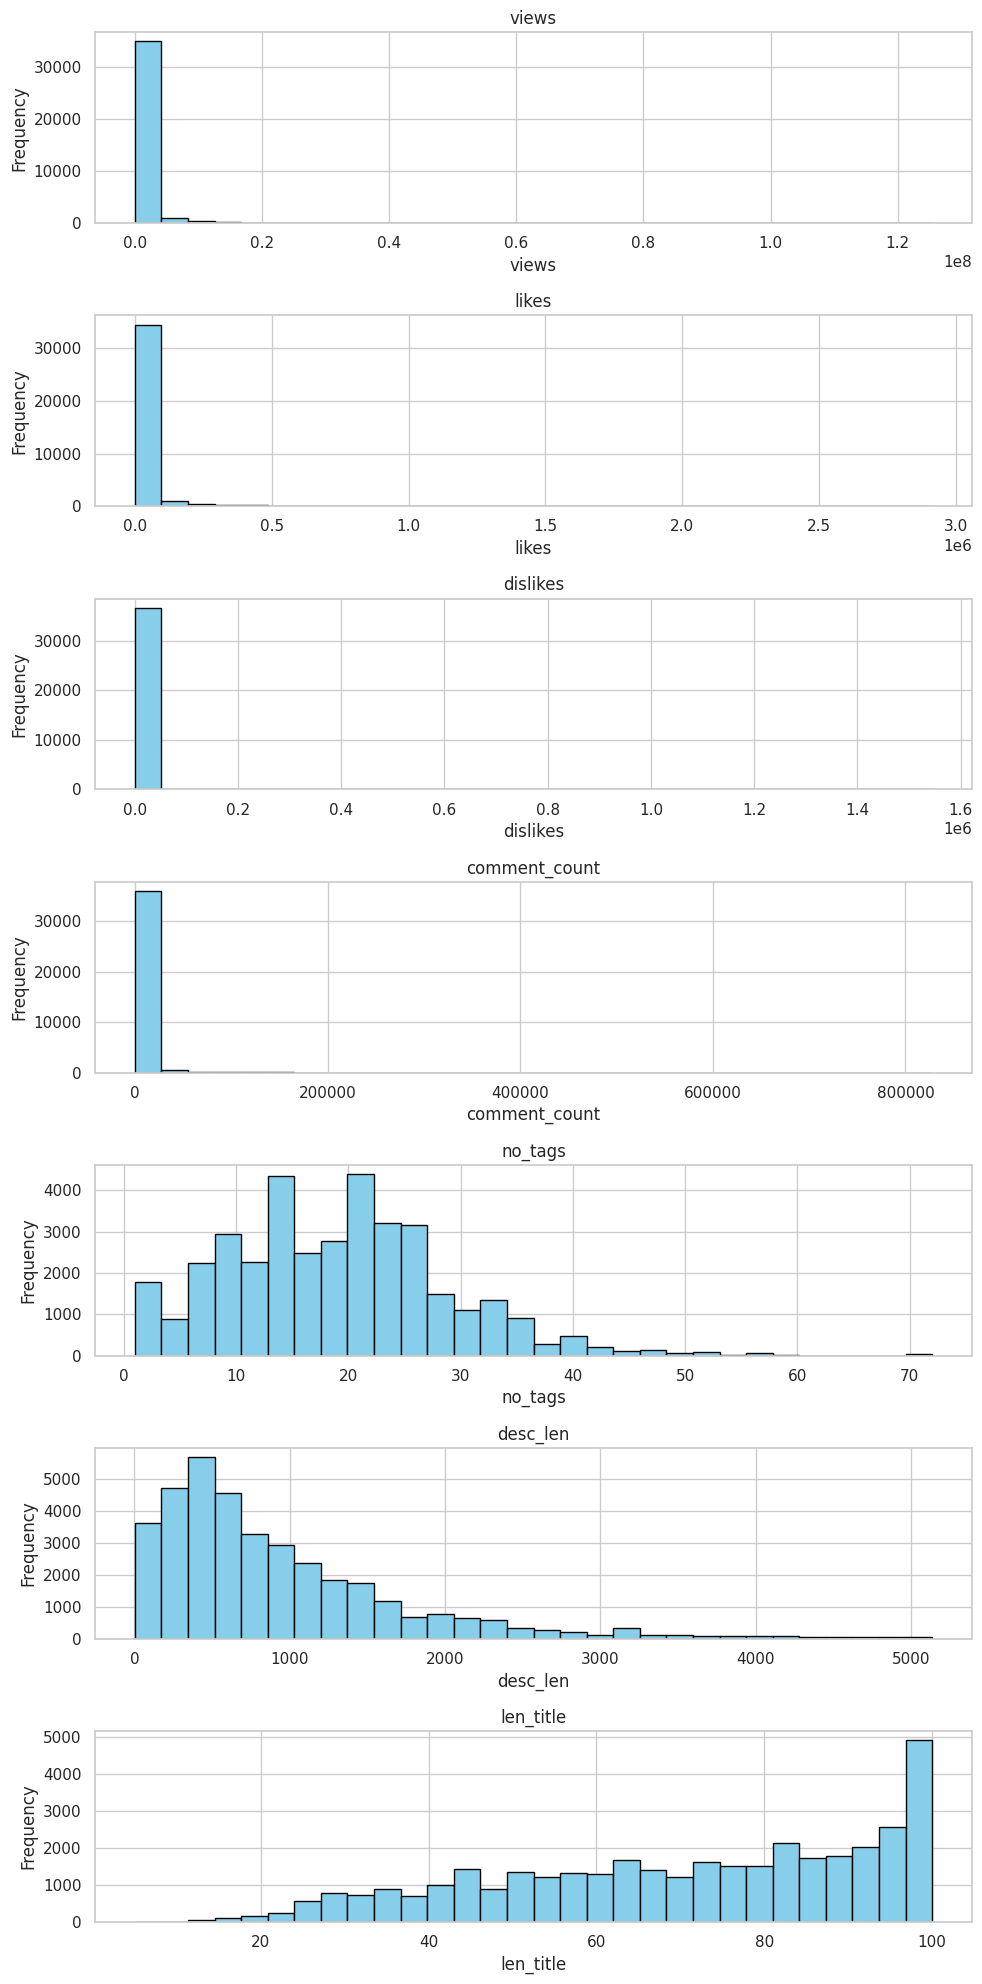

In [28]:
fig, axes = plt.subplots(nrows=len(num), ncols=1, figsize=(10, 20))

for i, col in enumerate(num):
    axes[i].hist(df[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

* Ada kecenderungan data banyak berkumpul di nilai minimum untuk fitur views, like, dislike, comment_count.
* Terlihat No_tags ada outlier di nilai maksimum, begitu juga untuk desc lennya.
* Ada len tittle yang sangat minim, yang mana kurang dari 20.

## Multivariate Analysis

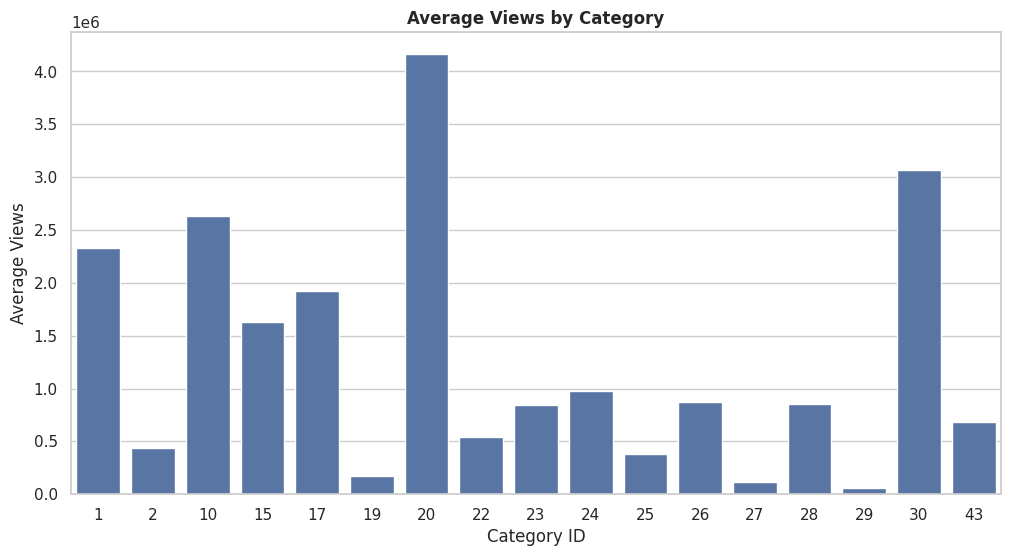

In [29]:
# Menentukan kategori video mana yang paling populer berdasarkan views.
plt.figure(figsize=(12, 6))
average_views = df.groupby('category_id')['views'].mean().sort_values(ascending=False)
sns.barplot(x=average_views.index, y=average_views.values)
plt.title("Average Views by Category", fontweight='bold')
plt.xlabel("Category ID")
plt.ylabel("Average Views")
plt.show()

Berdasarkan dari rata-rata views, jenis kategori yang memiliki minat paling tinggi berasal dari kategori 20. Sedangkan untuk kategori dengan minat terendah berasal dari kategori 19. Rata-rata ini menandakan bahwa minat yang tinggi terhadap suatu kategori menandakan video-video dengan jenis kategori tersebut memiliki kecenderungan untuk selalu dicari oleh viewers. Demikian sebaliknya untuk video-video dengan kategori yang rendah.

<ipython-input-30-c7c243c8241a>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


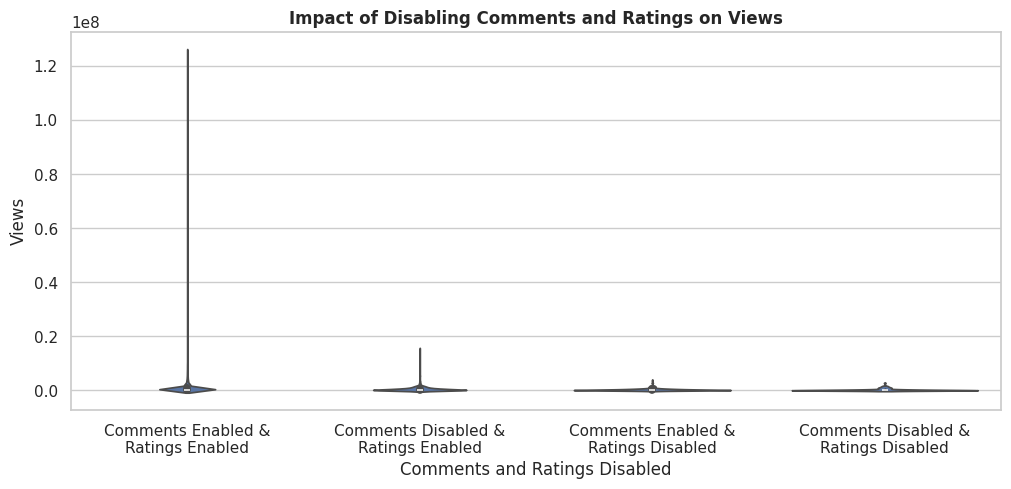

In [30]:
# Menilai dampak dari menonaktifkan komentar dan rating terhadap jumlah views.
df_copy = df.copy()
df_copy['comments_ratings_disabled'] = df_copy['comments_disabled'].astype(str) + ' & ' + df_copy['ratings_disabled'].astype(str)
plt.figure(figsize=(12,6))
ax = sns.violinplot(x='comments_ratings_disabled', y='views', data=df_copy)
plt.title('Impact of Disabling Comments and Ratings on Views', fontweight='bold')
plt.xlabel('Comments and Ratings Disabled')
plt.ylabel('Views')
labels = ['Comments Enabled &\nRatings Enabled',
          'Comments Disabled &\nRatings Enabled',
          'Comments Enabled &\nRatings Disabled',
          'Comments Disabled &\nRatings Disabled']
ax.set_xticklabels(labels)

plt.gcf().subplots_adjust(bottom=0.25)
plt.show()

Dilihat dari grafik dapat diketahui bahwa menonaktifkan fitur comment ataupun rating berdampak pada jumlah views dari video tersebut. Jumlah views ketika menonaktifkan fitur rating masih lebih baik daripada menonaktifkan fitur comment yang dimana dapat membatasi interaksi vierwers terhadap video, meskipun demikian kedua fitur ini mengakibatkan jumlah views yang sedikit jika dinonaktifkan.

<ipython-input-31-a7aabff0a99b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['publish_time'] = pd.to_datetime(df['publish_time'])


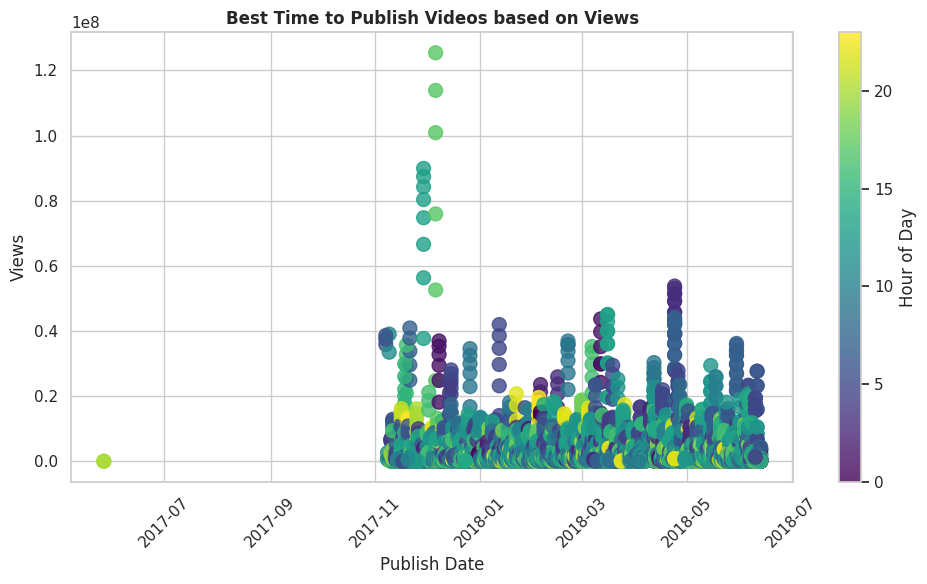

In [31]:
# Menemukan waktu terbaik untuk mempublikasikan video guna memaksimalkan jumlah views.
df['publish_time'] = pd.to_datetime(df['publish_time'])

# Ekstraksi jam, menit, dan detik
df['hour'] = df['publish_time'].dt.hour
df['minute'] = df['publish_time'].dt.minute
df['second'] = df['publish_time'].dt.second

# Plotting waktu terbaik berdasarkan jumlah views
plt.figure(figsize=(10, 6))
plt.scatter(df['publish_date'], df['views'], c=df['hour'], cmap='viridis', s=100, alpha=0.8)
plt.colorbar(label='Hour of Day')
plt.title('Best Time to Publish Videos based on Views', fontweight='bold')
plt.xlabel('Publish Date')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan garfik tersebut diketahui bahwa video yang memiliki viewers terbanyak ada pada sekitar pukul 15.00 hingga pukul 20.00.

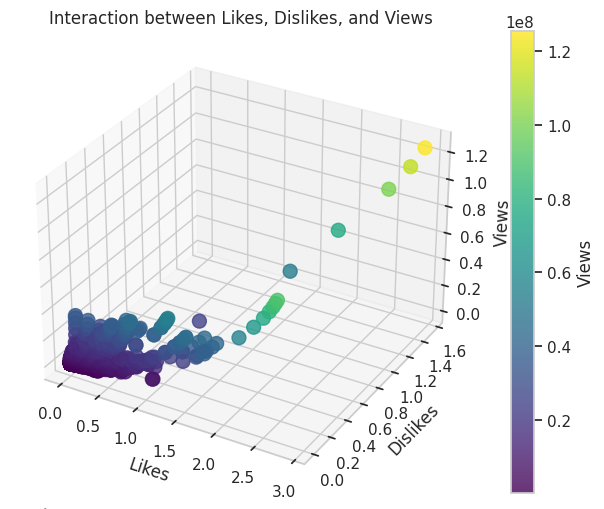

In [32]:
# Melihat bagaimana interaksi antara likes dan dislikes mempengaruhi views
# Membuat plot 3D scatter
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Menambahkan data ke plot
sc = ax.scatter(df['likes'], df['dislikes'], df['views'], c=df['views'], cmap='viridis', s=100, alpha=0.8)

# Menambahkan label dan judul
ax.set_xlabel('Likes')
ax.set_ylabel('Dislikes')
ax.set_zlabel('Views')
ax.set_title('Interaction between Likes, Dislikes, and Views')

# Menambahkan color bar
cbar = plt.colorbar(sc)
cbar.set_label('Views')

# Menampilkan plot
plt.show()

Dilihat dari grafik tersebut dapat diketahui bahwa rata-rata video yang ada kurang memiliki likes dan juga dislike, namun perbandingan likes dan dislikes terlihat seimbang, hal ini tentunya dipengaruhi oleh jumlah viewers yang sedikit juga. Maka dari itu untuk beberapa video yang memiliki likes terbanyak juga berbanding lurus dengan jumlah dislikesnya yang dapat menandakan jumlah viewers yang tinggi juga. Bertambahnya viewers menandakan bahwa viewers juga suka melakukan interaksi terhadap video yang mereka lihat.

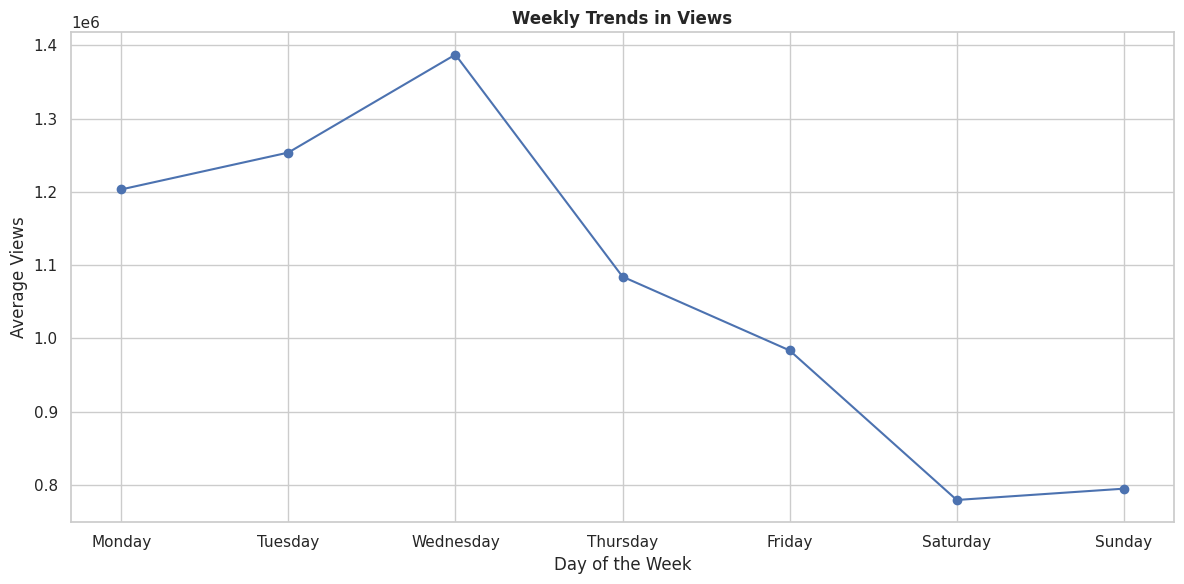

In [33]:
df_copy = df.copy()
df_copy['day_of_week'] = df_copy['publish_date'].dt.day_name()

# Agregasi data berdasarkan hari dalam seminggu dan bulan
weekly_trends = df_copy.groupby('day_of_week')['views'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting tren mingguan
plt.figure(figsize=(12, 6))
plt.plot(weekly_trends.index, weekly_trends.values, marker='o', linestyle='-', color='b')
plt.title('Weekly Trends in Views', fontweight='bold')
plt.xlabel('Day of the Week')
plt.ylabel('Average Views')
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan grafik jumlah viewers dilihat dari video yang dipublish berdasarkan hari tertentu menunjukkan rata-rata jumlah viewer tertinggi ada pada video yang dipublish di hari Rabu, sedangkan terendahnya ada pada hari Sabtu.

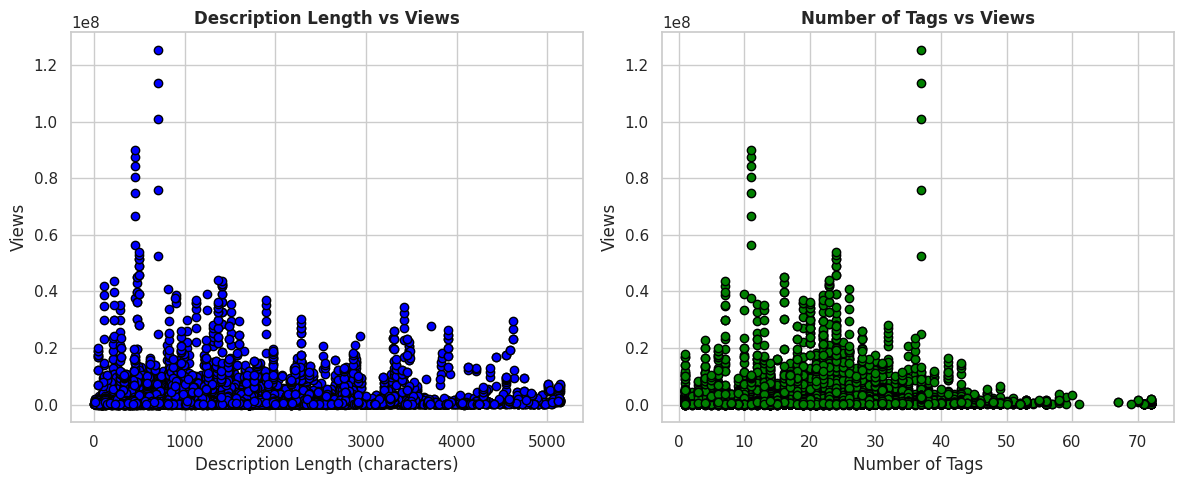

In [34]:
# Menilai seberapa penting panjang deskripsi dan jumlah tag dalam menarik views
# Membuat scatter plot untuk panjang deskripsi vs views
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['desc_len'], df['views'], color='blue', edgecolor='black')
plt.title('Description Length vs Views', fontweight='bold')
plt.xlabel('Description Length (characters)')
plt.ylabel('Views')
plt.grid(True)

# Membuat scatter plot untuk jumlah tag vs views
plt.subplot(1, 2, 2)
plt.scatter(df['no_tags'], df['views'], color='green', edgecolor='black')
plt.title('Number of Tags vs Views', fontweight='bold')
plt.xlabel('Number of Tags')
plt.ylabel('Views')
plt.grid(True)

plt.tight_layout()
plt.show()

Berdasarkan dua grafik tersebut baik panjangnya deskripsi maupun jumlah tags tidak sepenuhnya mempengaruhi video memiliki jumlah views yang banyak, namun masih ada kemungkinan untuk dapat mempengaruhi peningkat views. Jika dilihat dari panjangnya karakter deskripsi, menggunakan karakter yang lebih sedikit akan memiliki kecenderungan untuk dapat meningkatkan jumlah views. Penggunaan sebuah deskripsi harusnya lebih disesuaikan dari kebutuhan masing-masing pemilik video untuk dapat melengkapi informasi dari video yang di publish. Sedangkan, untuk jumlah tags yang digunakan berpengaruh jika jumlah penggunaan tagsnya tidak terlalu sedikit ataupun terlalu banyak. Hal ini bisa diperngaruhi juga dari jenis tags yang digunakan.

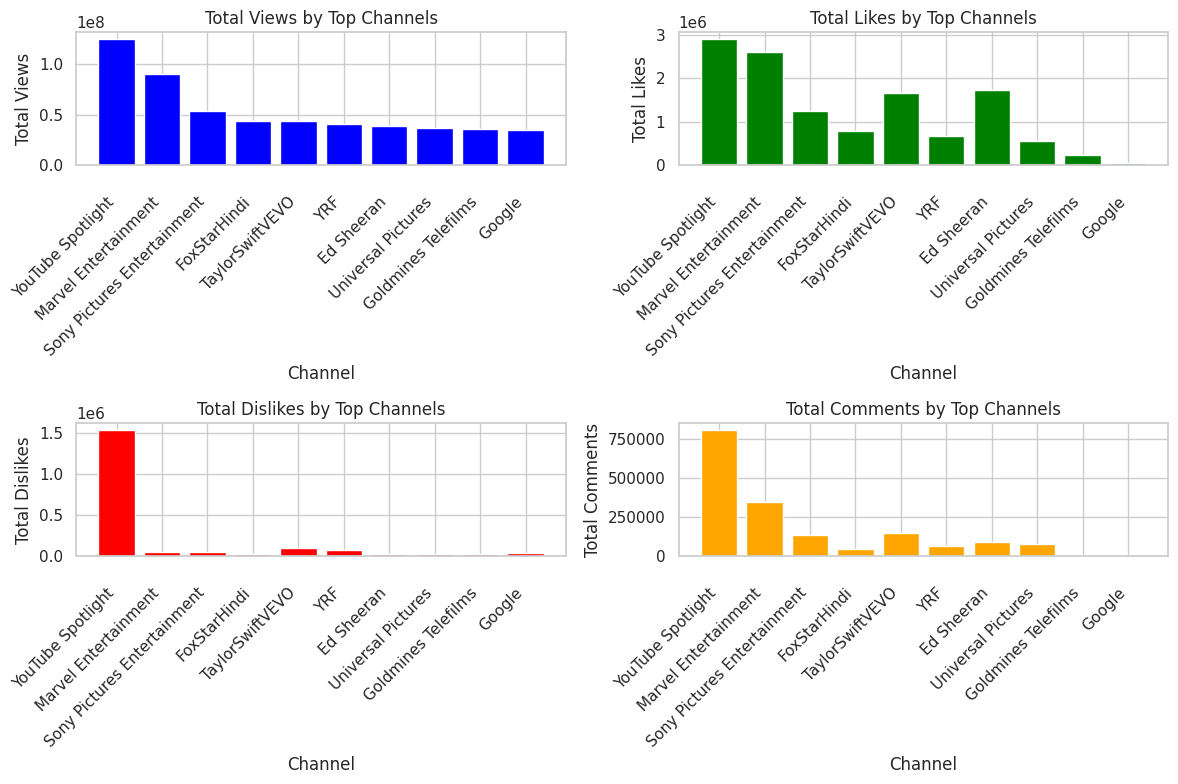

In [35]:
# Menentukan channel mana yang memiliki kinerja terbaik dan apa yang membuat mereka sukses.
# Hitung total views, likes, dislikes, dan komentar untuk setiap channel
df['total_engagement'] = df['likes'] + df['dislikes'] + df['comment_count']

# Memilih 10 channel dengan views tertinggi
df_top_channels = df.nlargest(100, 'views')

# Menghapus duplikasi berdasarkan channel_title
df_top_channels = df_top_channels.drop_duplicates(subset='channel_title')

# Memastikan hanya 10 baris unik
df_top_channels = df_top_channels.head(10)

# Membuat plot untuk membandingkan performa channel
plt.figure(figsize=(12, 8))

# Bar plot untuk total views
plt.subplot(2, 2, 1)
bars = plt.bar(df_top_channels['channel_title'], df_top_channels['views'], color='blue')
plt.title('Total Views by Top Channels')
plt.xlabel('Channel')
plt.ylabel('Total Views')
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', which='major', pad=15)  # Menambahkan padding agar tidak berbenturan
plt.grid(True)

# Bar plot untuk total likes
plt.subplot(2, 2, 2)
bars = plt.bar(df_top_channels['channel_title'], df_top_channels['likes'], color='green')
plt.title('Total Likes by Top Channels')
plt.xlabel('Channel')
plt.ylabel('Total Likes')
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', which='major', pad=15)  # Menambahkan padding agar tidak berbenturan
plt.grid(True)

# Bar plot untuk total dislikes
plt.subplot(2, 2, 3)
bars = plt.bar(df_top_channels['channel_title'], df_top_channels['dislikes'], color='red')
plt.title('Total Dislikes by Top Channels')
plt.xlabel('Channel')
plt.ylabel('Total Dislikes')
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', which='major', pad=15)  # Menambahkan padding agar tidak berbenturan
plt.grid(True)

# Bar plot untuk total komentar
plt.subplot(2, 2, 4)
bars = plt.bar(df_top_channels['channel_title'], df_top_channels['comment_count'], color='orange')
plt.title('Total Comments by Top Channels')
plt.xlabel('Channel')
plt.ylabel('Total Comments')
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', which='major', pad=15)  # Menambahkan padding agar tidak berbenturan
plt.grid(True)

plt.tight_layout()
plt.show()

Dari 4 tabel tersebut menunjukkan bahwa jumlah views yang besar juga dipengaruhi oleh interaksi yang kuat dari viewers baik itu dari likes, dislike, dan commentnya. Namun, tidak semua video dari sebuah channel selalu memiliki interaksi yang seimbang antara ke 4 faktor tersebut. Untuk beberapa video yang benar-benar bagus justru tidak menunjukkan jumlah dislike yang tinggi.

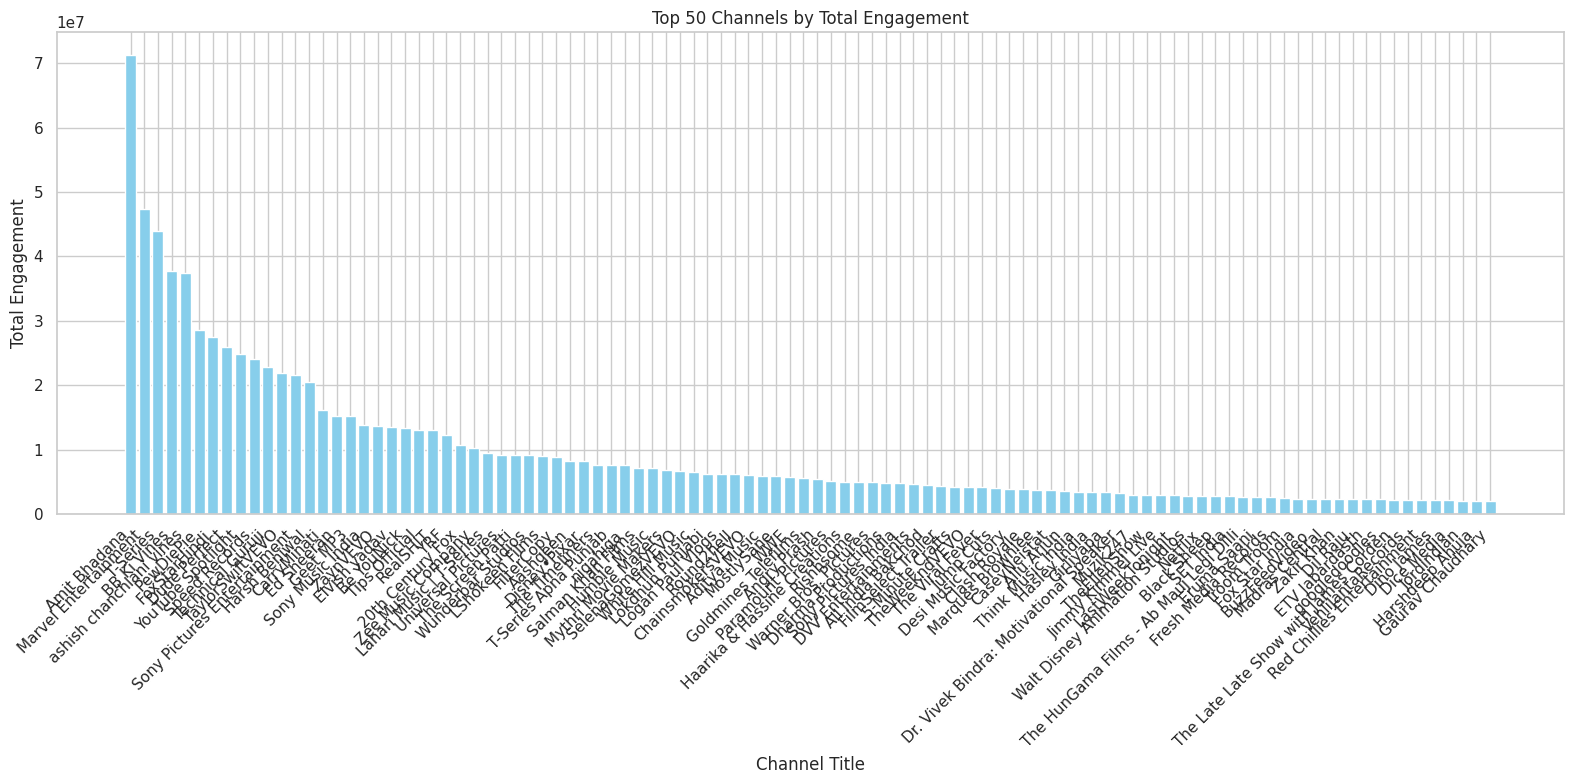

In [36]:
# Group by channel_title dan hitung total engagement untuk setiap channel
total_engagement_per_channel = df.groupby('channel_title')['total_engagement'].sum().reset_index()

total_engagement_per_channel = total_engagement_per_channel.sort_values(by='total_engagement', ascending=False)

# Ambil 50 channel teratas
top_50_channels = total_engagement_per_channel.head(100)

# Plot grafik total engagement per channel (top 50 channels)
plt.figure(figsize=(16, 8))
plt.bar(top_50_channels['channel_title'], top_50_channels['total_engagement'], color='skyblue')
plt.xlabel('Channel Title')
plt.ylabel('Total Engagement')
plt.title('Top 50 Channels by Total Engagement')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

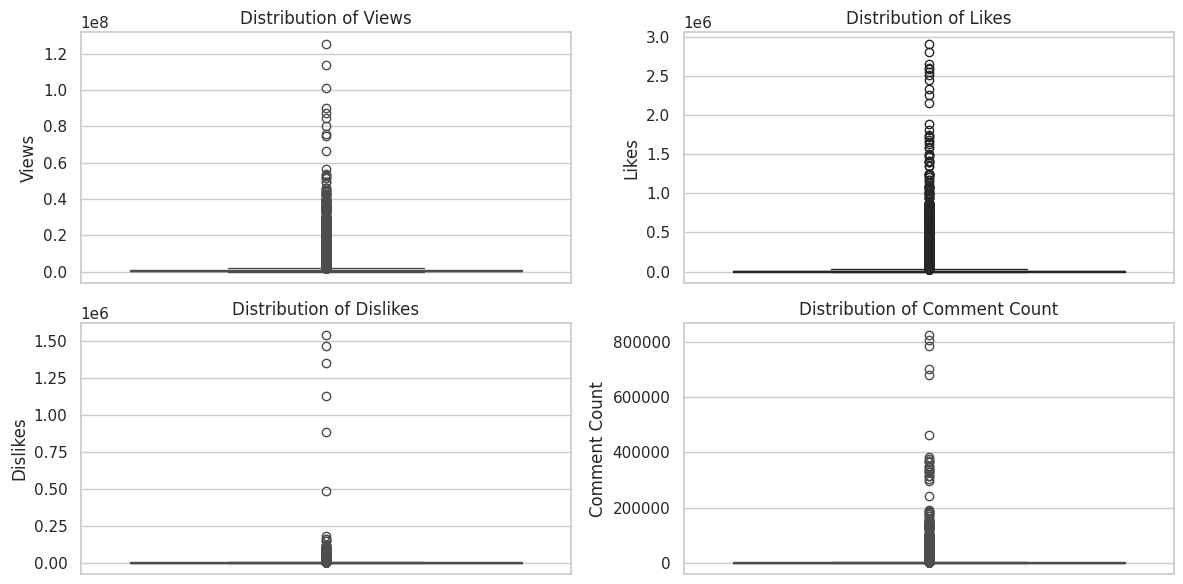

In [37]:
# Membuat box plot untuk melihat distribusi dan outliers
plt.figure(figsize=(12, 6))

# Box plot untuk kolom 'views'
plt.subplot(2, 2, 1)
sns.boxplot(y=df['views'], color='blue')
plt.title('Distribution of Views')
plt.ylabel('Views')

# Box plot untuk kolom 'likes'
plt.subplot(2, 2, 2)
sns.boxplot(y=df['likes'], color='green')
plt.title('Distribution of Likes')
plt.ylabel('Likes')

# Box plot untuk kolom 'dislikes'
plt.subplot(2, 2, 3)
sns.boxplot(y=df['dislikes'], color='red')
plt.title('Distribution of Dislikes')
plt.ylabel('Dislikes')

# Box plot untuk kolom 'comment_count'
plt.subplot(2, 2, 4)
sns.boxplot(y=df['comment_count'], color='orange')
plt.title('Distribution of Comment Count')
plt.ylabel('Comment Count')

plt.tight_layout()
plt.show()

Terlihat terdapat ouliers pada faktor-faktor yang dapat membuat sebuah video terbilang sukses atau gagal, karena ada beberapa video yang memiliki value yang berbeda dari kebanyakan video lainnya.

<Axes: >

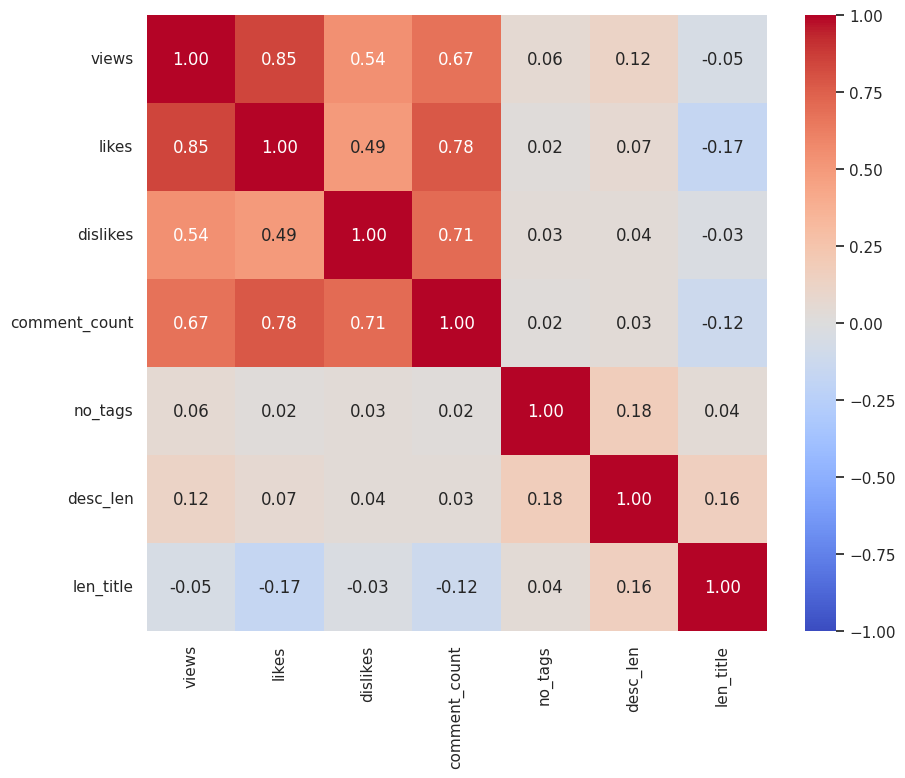

In [38]:
correlation_matrix = df[num].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)

Ada beberapa fitur yang memiliki korelasi yang kuat dengan targetnya (viewsnya): <br>
1. Korelasi kuat positif: likes(0.85), comment_count(0.67), dislikes (0.54). Semakin besar fitur fitur ini, maka akan lebih membuat suatu video viewsnya tinggi.
2. Korelasi kuat negatif: len_title. Semakin rendah fitur ini, maka cenderung suatu video viewsnya tinggi.

# **Business Recomendation**

1. Fokus pada Kategori yang Populer
Prioritaskan pembuatan konten untuk kategori yang memiliki minat tinggi, seperti kategori 20. Buat konten yang relevan dan menarik untuk audiens dalam kategori ini.

2. Interaksi Viewer
* Jangan menonaktifkan fitur komentar dan rating pada video. Fitur ini memungkinkan interaksi langsung dengan penonton dan dapat meningkatkan jumlah views.
* Aktifkan dan tanggapi komentar dari penonton untuk membangun komunitas yang lebih terlibat.

3. Waktu Publikasi
Publikasikan video pada waktu puncak, yaitu antara pukul 15.00 hingga 20.00, untuk memaksimalkan jumlah views.

4. Hari Publikasi
Prioritaskan publikasi video pada hari Rabu untuk mendapatkan rata-rata jumlah viewers yang tinggi.
Hindari publikasi video pada hari Sabtu jika memungkinkan.

5. Tren Bulanan
Manfaatkan bulan-bulan dengan tren views yang tinggi seperti April dan Juni. Rencanakan kampanye konten atau promosi khusus selama bulan-bulan ini.

6. Deskripsi dan Tags
Buat deskripsi yang singkat, jelas, dan padat informasi. Hindari penggunaan karakter yang terlalu banyak yang dapat mengurangi jumlah views.
Gunakan jumlah tags yang optimal, tidak terlalu sedikit atau terlalu banyak, dan pastikan tags relevan dengan konten video.


# **Data Preprocessing**

## Missing Value

In [39]:
df.isna().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
no_tags                    0
desc_len                   0
len_title                  0
publish_date               0
year                       0
month                      0
hour                       0
minute                     0
second                     0
total_engagement           0
dtype: int64

In [40]:
(45/36791)*100

0.12231252208420537

Terdapat missing value pada fitur description. Namun hanya berbobot 0.122%

### Treatment Missing Value
Karena description tidak terlalu penting, hanya penjelas suatu video saja. Dan bobot missing value description pada data juga tidak terlalu banyak, hanya sebesar 0.122% maka dilakukan penginputan kalimat 'Tidak ada deskripsi' pada data kosong di description

In [41]:
df['description'].fillna('Tidak Ada Deskripsi', inplace=True)

In [42]:
df.isna().sum()

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
no_tags                   0
desc_len                  0
len_title                 0
publish_date              0
year                      0
month                     0
hour                      0
minute                    0
second                    0
total_engagement          0
dtype: int64

## Cek Data Duplikat

In [43]:
df.duplicated().sum()

4229

In [44]:
duplicates = df[df.duplicated(keep=False)]
duplicates.sort_values(by=['trending_date','title'])

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,no_tags,desc_len,len_title,publish_date,year,month,hour,minute,second,total_engagement
1571,2017-11-22,5th day IND vs SL 1st test: Shami gets angry o...,Headlines Sports,17,2024-06-29 11:05:20,"India vs Sri lanka 1st test|""day 5 ind vs sl""|...",311208,1305,448,103,...,7,570,85,2017-11-20,2017,11,11,5,20,1856
1684,2017-11-22,5th day IND vs SL 1st test: Shami gets angry o...,Headlines Sports,17,2024-06-29 11:05:20,"India vs Sri lanka 1st test|""day 5 ind vs sl""|...",311208,1305,448,103,...,7,570,85,2017-11-20,2017,11,11,5,20,1856
1542,2017-11-22,Aiyaary Sizzle | Neeraj Pandey | Sidharth Malh...,Reliance Entertainment,24,2024-06-29 11:00:47,"Neeraj Pandey|""Shital Bhatia""|""Friday Filmwork...",589413,5372,298,592,...,13,814,96,2017-11-18,2017,11,11,0,47,6262
1655,2017-11-22,Aiyaary Sizzle | Neeraj Pandey | Sidharth Malh...,Reliance Entertainment,24,2024-06-29 11:00:47,"Neeraj Pandey|""Shital Bhatia""|""Friday Filmwork...",589413,5372,298,592,...,13,814,96,2017-11-18,2017,11,11,0,47,6262
1569,2017-11-22,Ama Ghara Laxmi & Ranee | Maha Adhaya | Full E...,Tarang TV,24,2024-06-29 15:31:00,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",83316,250,62,18,...,24,492,86,2017-11-20,2017,11,15,31,0,330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36781,2018-06-14,भय्यू महाराजांची सुसाईड नोट सापडली,ZEE 24 TAAS,25,2024-06-29 10:27:38,"zee24taas|""marathi video""|""marathi news""|""Brea...",339265,434,185,73,...,25,285,34,2018-06-12,2018,6,10,27,38,692
36644,2018-06-14,માલ માટે મેનત તો કરવી જ પડે હો || dhaval doma...,Dhaval Domadiya,24,2024-06-29 05:30:00,"dhaval domadiya|""dhaval domadiya new video""|""d...",391397,9110,489,469,...,3,146,50,2018-06-13,2018,6,5,30,0,10068
36765,2018-06-14,માલ માટે મેનત તો કરવી જ પડે હો || dhaval doma...,Dhaval Domadiya,24,2024-06-29 05:30:00,"dhaval domadiya|""dhaval domadiya new video""|""d...",391397,9110,489,469,...,3,146,50,2018-06-13,2018,6,5,30,0,10068
36655,2018-06-14,வாணி ராணி - VAANI RANI - Episode 1593 - 13/6/...,RadaanMedia,24,2024-06-29 16:30:00,"Vaani rani|""rani""|""Radhika in funny character""...",341799,2197,329,267,...,13,3102,50,2018-06-13,2018,6,16,30,0,2793


In [45]:
(4229/36791) * 100

11.49465901986899

Terdapat data duplikat, dimana baris data pada tiap kolmnya berisi sama sebesar 11.5%. Bobot yang cukup besar, namun apabila data tetap dipertahankan hanya akan menimbulkan kebocoran data pada saat proses pemodelan. Dilakukan penghapusan data duplikat, dan menyisakan 1 baris.

### Treatment Data Duplikat

In [46]:
df = df.drop_duplicates(keep='first')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32562 entries, 0 to 36769
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           32562 non-null  object        
 1   title                   32562 non-null  object        
 2   channel_title           32562 non-null  object        
 3   category_id             32562 non-null  int64         
 4   publish_time            32562 non-null  datetime64[ns]
 5   tags                    32562 non-null  object        
 6   views                   32562 non-null  int64         
 7   likes                   32562 non-null  int64         
 8   dislikes                32562 non-null  int64         
 9   comment_count           32562 non-null  int64         
 10  comments_disabled       32562 non-null  bool          
 11  ratings_disabled        32562 non-null  bool          
 12  video_error_or_removed  32562 non-null  bool       

## Handling Outlier

In [48]:
def check_outliers(df):
    outliers = pd.DataFrame(columns=df[num].columns)

    for col in num:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = (lower_bound, upper_bound)
    return outliers

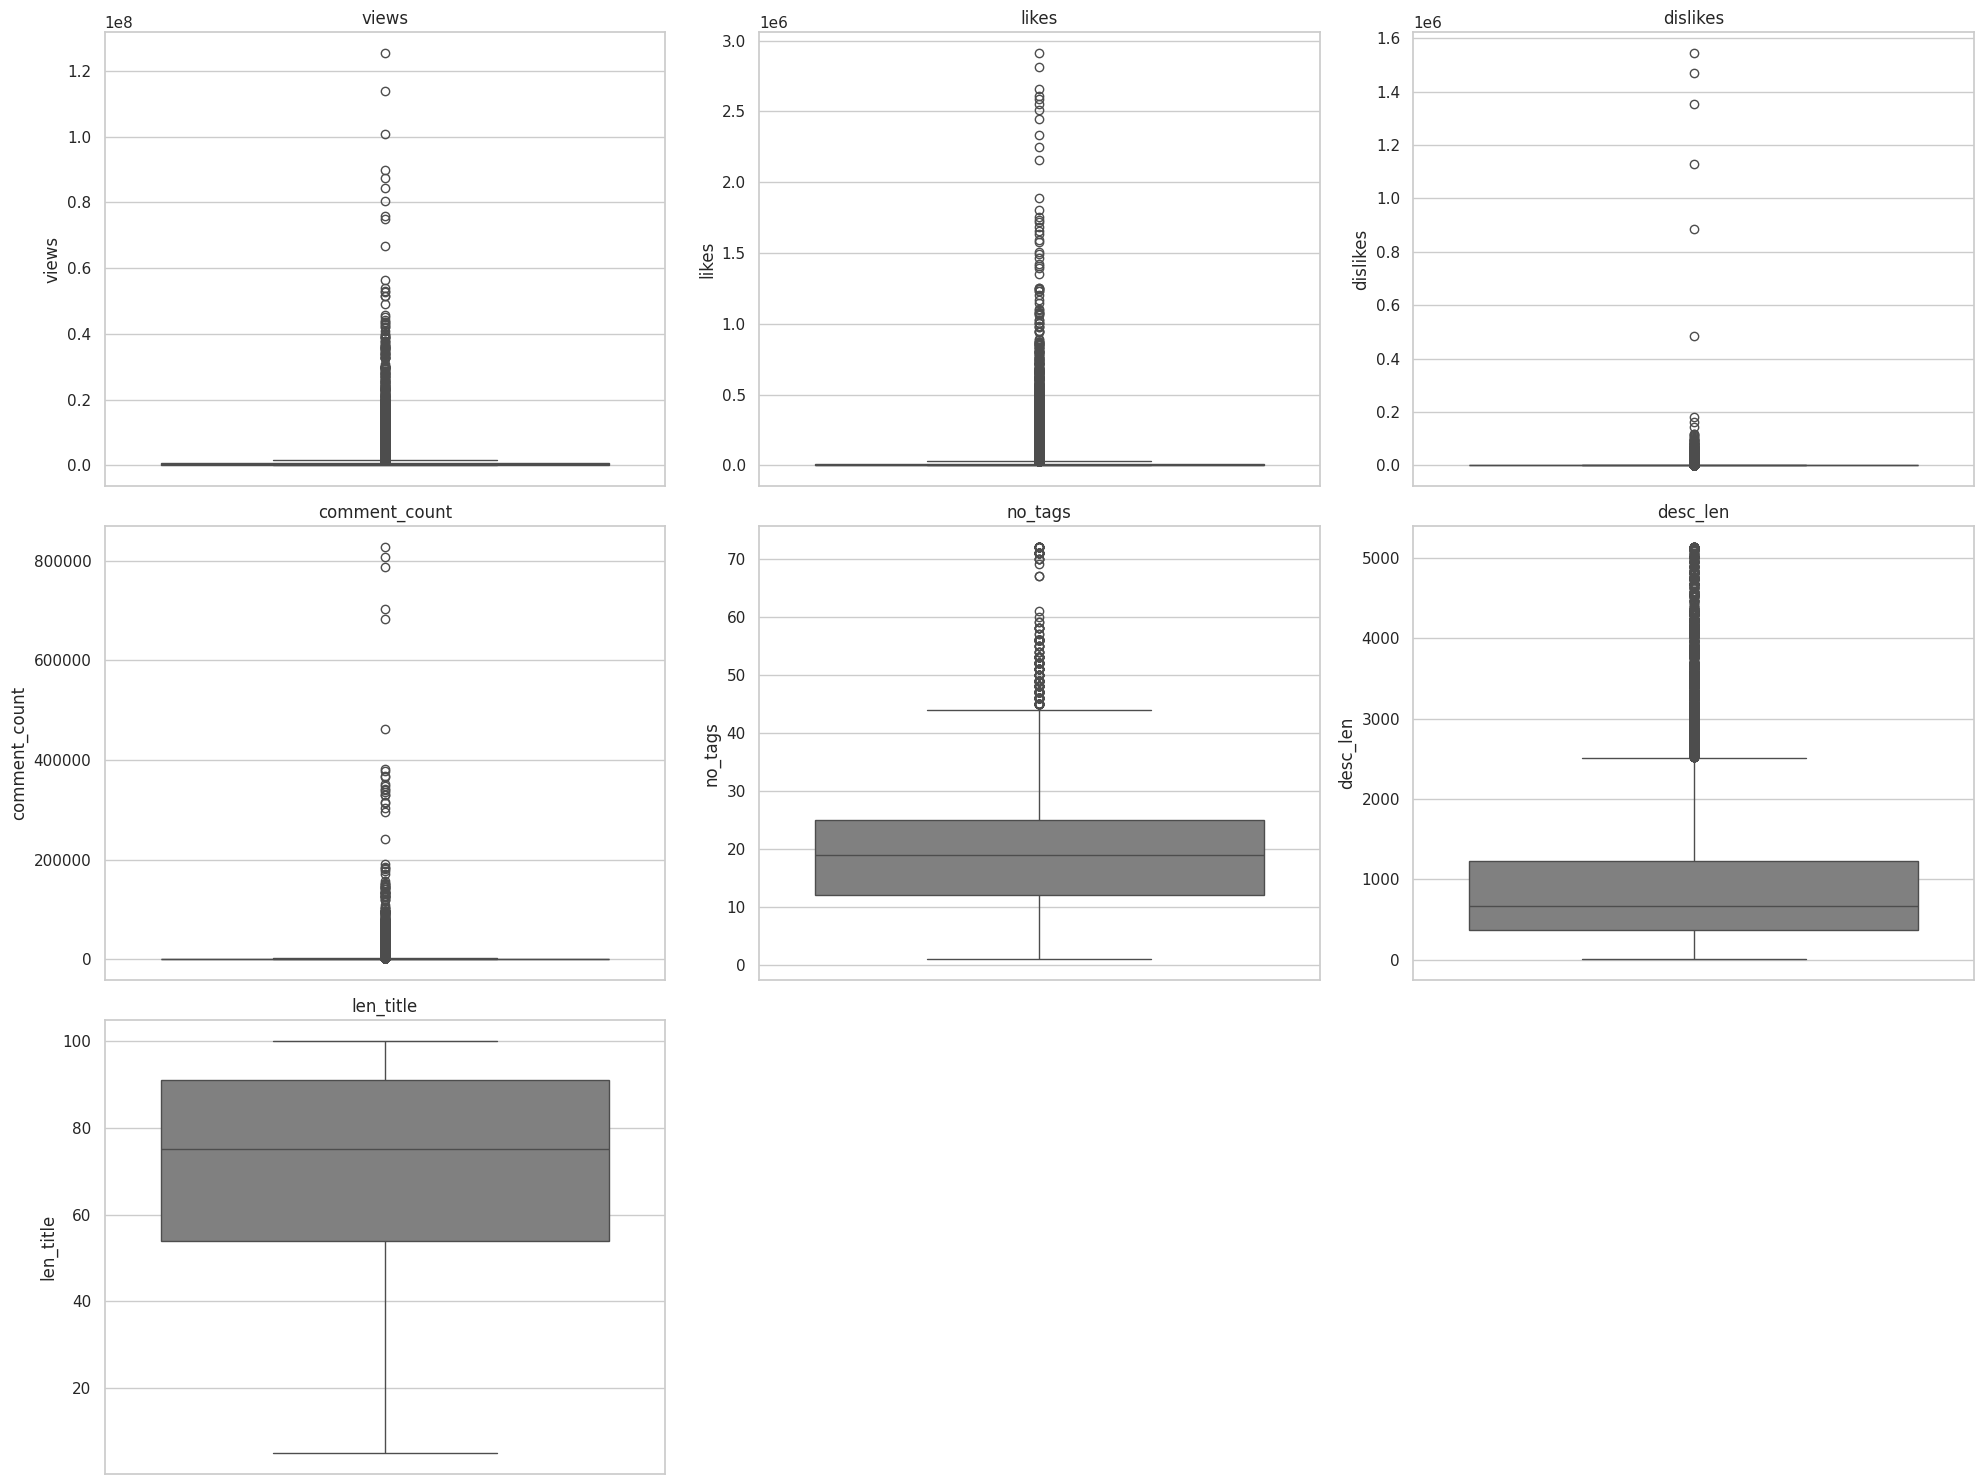

In [49]:
plt.figure(figsize=(20, 15))

for i in range(len(num)):
    plt.subplot(len(num) // 3 + 1, 3, i + 1)
    sns.boxplot(y=df[num[i]], color='gray', orient='v')
    plt.title(num[i])

plt.tight_layout()
plt.show()

In [50]:
def calculate_percentage_in_range(df, num, outliers):
  percentage_in_range = {}
  for col in num:
    lower_bound, upper_bound = outliers[col]
    in_range_count = df[(df[col] <= lower_bound) | (df[col] >= upper_bound)][col].count()
    total_count = df[col].count()
    percentage = (in_range_count / total_count) * 100
    percentage_in_range[col] = percentage
  return percentage_in_range

outliers = check_outliers(df)
percentage_in_range = calculate_percentage_in_range(df, num, outliers)

percentage_in_range

{'views': 11.464283520668264,
 'likes': 15.217124255266876,
 'dislikes': 11.974080216202935,
 'comment_count': 12.966034027393894,
 'no_tags': 1.2284257723727043,
 'desc_len': 4.925987347214544,
 'len_title': 0.0}

Melihat persentase outliers dari setiap fitur, dilakukan pengolahan outliers hanya pada data yang memiliki outliers sebesar 5% atau kurang karena kalau memakai yang lebih dari 5% akan berpengaruh pada data yang akan dikelola dan membuat data menjadi semakin sedikit

In [51]:
# #outliers of category_id column
# Q1_category_id = df['category_id'].quantile(0.25)
# Q3_category_id = df['category_id'].quantile(0.75)
# IQR_category_id = Q3_category_id - Q1_category_id
# lower_bound_cat = Q1_category_id - 1.5 * IQR_category_id
# upper_bound_cat = Q3_category_id + 1.5 * IQR_category_id

# #outliers of views column
# Q1_views = df['views'].quantile(0.25)
# Q3_views = df['views'].quantile(0.75)
# IQR_views = Q3_views - Q1_views
# lower_bound_views = Q1_views - 1.5 * IQR_views
# upper_bound_views = Q3_views + 1.5 * IQR_views

# #outliers of likes column
# Q1_likes = df['likes'].quantile(0.25)
# Q3_likes = df['likes'].quantile(0.75)
# IQR_likes = Q3_likes - Q1_likes
# lower_bound_likes = Q1_likes - 1.5 * IQR_likes
# upper_bound_likes = Q3_likes + 1.5 * IQR_likes

# #outliers of dislikes column
# Q1_dislikes = df['dislikes'].quantile(0.25)
# Q3_dislikes = df['dislikes'].quantile(0.75)
# IQR_dislikes = Q3_dislikes - Q1_dislikes
# lower_bound_dislikes = Q1_dislikes - 1.5 * IQR_dislikes
# upper_bound_dislikes = Q3_dislikes + 1.5 * IQR_dislikes

# #outliers of comment_count column
# Q1_comment_count = df['comment_count'].quantile(0.25)
# Q3_comment_count = df['comment_count'].quantile(0.75)
# IQR_comment_count = Q3_comment_count - Q1_comment_count
# lower_bound_cc = Q1_comment_count - 1.5 * IQR_comment_count
# upper_bound_cc = Q3_comment_count + 1.5 * IQR_comment_count

#outliers of No_tags column
Q1_no_tags = df['no_tags'].quantile(0.25)
Q3_no_tags = df['no_tags'].quantile(0.75)
IQR_no_tags = Q3_no_tags - Q1_no_tags
lower_bound_nt = Q1_no_tags - 1.5 * IQR_no_tags
upper_bound_nt = Q3_no_tags + 1.5 * IQR_no_tags

#outliers of desc_len column
Q1_desc_len = df['desc_len'].quantile(0.25)
Q3_desc_len = df['desc_len'].quantile(0.75)
IQR_desc_len = Q3_desc_len - Q1_desc_len
lower_bound_dl = Q1_desc_len - 1.5 * IQR_desc_len
upper_bound_dl = Q3_desc_len + 1.5 * IQR_desc_len

In [52]:
df_clean = df[
    # (df['category_id'] >= lower_bound_cat) & (df['category_id'] <= upper_bound_cat) &
    # (df['views'] >= lower_bound_views) & (df['views'] <= upper_bound_views) &
    # (df['likes'] >= lower_bound_likes) & (df['likes'] <= upper_bound_likes) &
    # (df['dislikes'] >= lower_bound_dislikes) & (df['dislikes'] <= upper_bound_dislikes) &
    # (df['comment_count'] >= lower_bound_cc) & (df['comment_count'] <= upper_bound_cc) &
    (df['no_tags'] >= lower_bound_nt) & (df['no_tags'] <= upper_bound_nt) &
    (df['desc_len'] >= lower_bound_dl) & (df['desc_len'] <= upper_bound_dl)
]

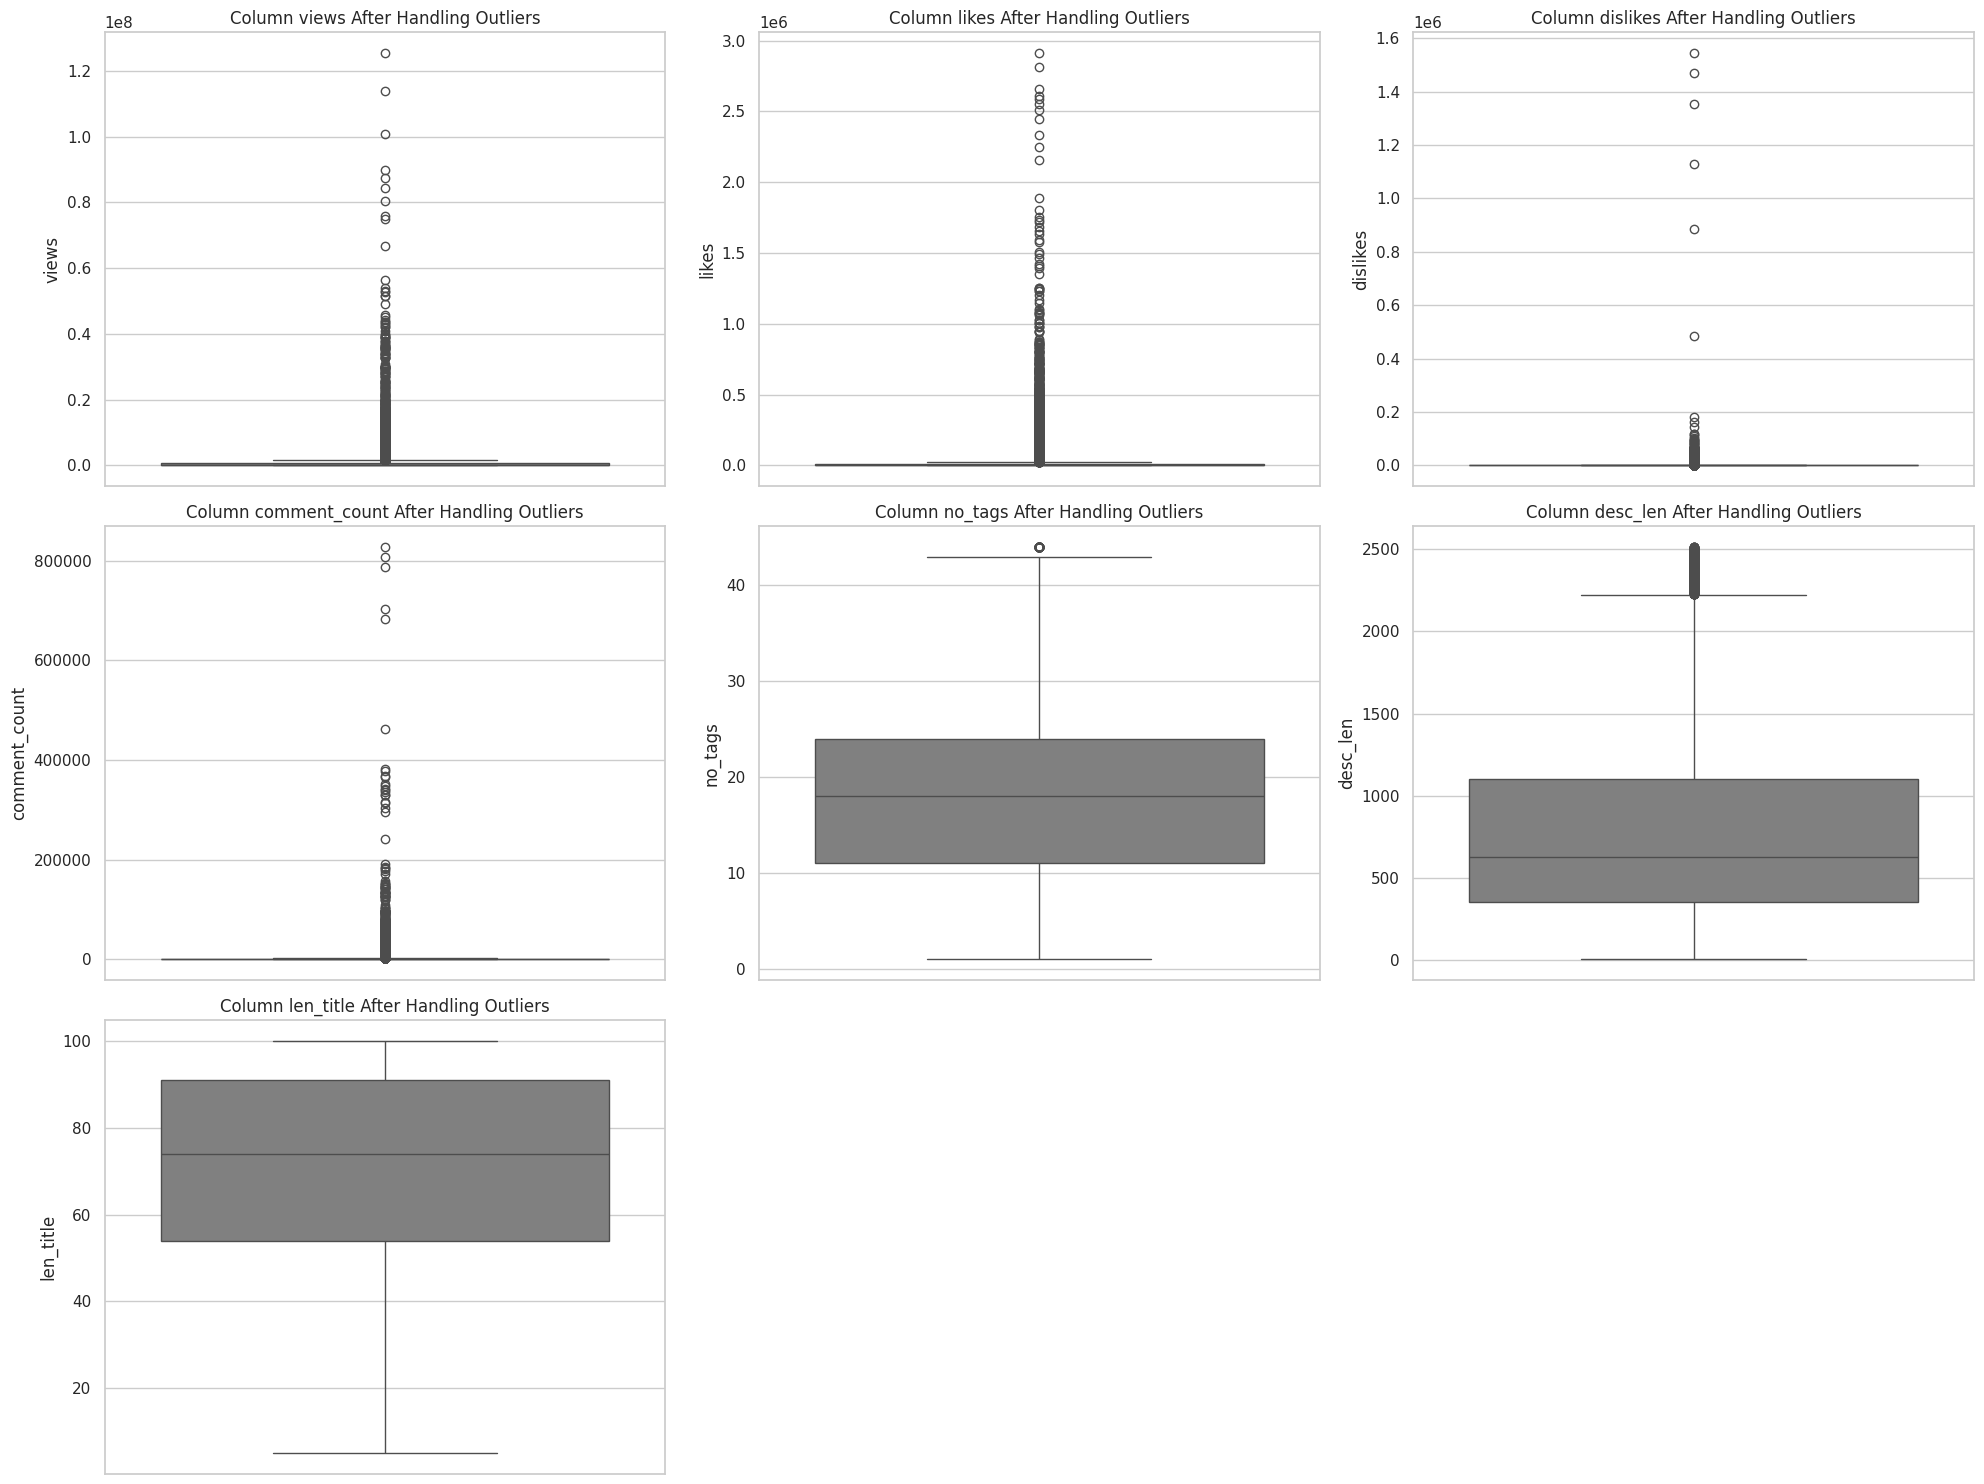

In [53]:
plt.figure(figsize=(20, 15))

for i in range(len(num)):
    plt.subplot(len(num) // 3 + 1, 3, i + 1)
    sns.boxplot(y=df_clean[num[i]], color='gray', orient='v')
    plt.title(f"Column {num[i]} After Handling Outliers")

plt.tight_layout()
plt.show()

In [54]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30567 entries, 0 to 36769
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           30567 non-null  object        
 1   title                   30567 non-null  object        
 2   channel_title           30567 non-null  object        
 3   category_id             30567 non-null  int64         
 4   publish_time            30567 non-null  datetime64[ns]
 5   tags                    30567 non-null  object        
 6   views                   30567 non-null  int64         
 7   likes                   30567 non-null  int64         
 8   dislikes                30567 non-null  int64         
 9   comment_count           30567 non-null  int64         
 10  comments_disabled       30567 non-null  bool          
 11  ratings_disabled        30567 non-null  bool          
 12  video_error_or_removed  30567 non-null  bool       

# **Feature Encoding**

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32562 entries, 0 to 36769
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           32562 non-null  object        
 1   title                   32562 non-null  object        
 2   channel_title           32562 non-null  object        
 3   category_id             32562 non-null  int64         
 4   publish_time            32562 non-null  datetime64[ns]
 5   tags                    32562 non-null  object        
 6   views                   32562 non-null  int64         
 7   likes                   32562 non-null  int64         
 8   dislikes                32562 non-null  int64         
 9   comment_count           32562 non-null  int64         
 10  comments_disabled       32562 non-null  bool          
 11  ratings_disabled        32562 non-null  bool          
 12  video_error_or_removed  32562 non-null  bool       

- trending_date dan publish_date format data diganti menjadi datetime
- comments_disabled, ratings_disabled, dan video_error_or_removed diganti menjadi 1 untuk True dan 0 untuk False.

In [56]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%Y-%m-%d')

In [57]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%H:%M:%S').dt.time
print(type(df['publish_time'][0]))

<class 'datetime.time'>


In [58]:
# Extract features from trending dates
df['trending_day'] = df['trending_date'].dt.day
df['trending_month'] = df['trending_date'].dt.month
df['trending_year'] = df['trending_date'].dt.year

In [59]:
# Convert time column to datetime and extract hour, minute, second
df['publish_hour'] = df['publish_time'].apply(lambda x: x.hour)
df['publish_minute'] = df['publish_time'].apply(lambda x: x.minute)
df['publish_second'] = df['publish_time'].apply(lambda x: x.second)

convert publish_time jadi second dalam bentuk int

In [60]:
#rubah data boolean menjadi 1 dan 0 pada ketiga kolom tersebut
df['comments_disabled'] =df['comments_disabled'].astype(int)
df['ratings_disabled'] =df['ratings_disabled'].astype(int)
df['video_error_or_removed'] =df['video_error_or_removed'].astype(int)

In [61]:
views_mean = df['views'].mean()
views_median = df['views'].median()
views_q1 = df['views'].quantile(.25)
views_q3 = df['views'].quantile(.75)
views_max = df['views'].max()
views_min = df['views'].min()

print('mean',views_mean)
print('median',views_median)
print('q1',views_q1)
print('q3',views_q3)
print('max',views_max)
print('min',views_min)

mean 1007091.465296972
median 277788.0
q1 114162.25
q3 738924.5
max 125432237
min 4024


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32562 entries, 0 to 36769
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           32562 non-null  datetime64[ns]
 1   title                   32562 non-null  object        
 2   channel_title           32562 non-null  object        
 3   category_id             32562 non-null  int64         
 4   publish_time            32562 non-null  object        
 5   tags                    32562 non-null  object        
 6   views                   32562 non-null  int64         
 7   likes                   32562 non-null  int64         
 8   dislikes                32562 non-null  int64         
 9   comment_count           32562 non-null  int64         
 10  comments_disabled       32562 non-null  int64         
 11  ratings_disabled        32562 non-null  int64         
 12  video_error_or_removed  32562 non-null  int64      

# **Feature Engineering**

**FEATURE ENGINEERING**

1. drop kolom file description dikarenakan sudah ada fitur yang lebih bermakna yaitu desc_len (panjang kata deskripsi video)
3. tambahkan fitur Time of Day Published = fitur menentukan waktu pubish (morning = 5-12, afternoon = 12-17, evening = 17-21, night = 21-5) hal ini bertujuan untuk menentukan diwaktu kapan sebaiknya publish video dilakukan
4. tambahkan fitur Engagement Rate = untuk mengukur tingkat keterlibatan penonton dengan konten,hal ini bertujuan agar mengetahui jenis konten yang paling efektif dan menarik bagi penonton ( likes + dislikes + comment count / views)
5. tambahkan fitur video age days= untuk melihat informasi mengenai berapa lama video tersebut telah dipublikasikan relatif terhadap video yang paling baru dipublikasikan dalam dataset.

In [63]:
# fitur Time of Day Published dengan masing-masing kolom
def is_morning(hour):
    return 1 if 5 <= hour < 12 else 0

def is_afternoon(hour):
    return 1 if 12 <= hour < 17 else 0

def is_evening(hour):
    return 1 if 17 <= hour < 21 else 0

def is_night(hour):
    return 1 if (21 <= hour or hour < 5) else 0

df['morning'] = df['publish_date'].dt.hour.apply(is_morning)
df['afternoon'] = df['publish_date'].dt.hour.apply(is_afternoon)
df['evening'] = df['publish_date'].dt.hour.apply(is_evening)
df['night'] = df['publish_date'].dt.hour.apply(is_night)

In [64]:
#fitur Engagement Rate
df['engagement_rate'] = (df['likes'] + df['dislikes'] + df['comment_count']) / df['views']

In [65]:
# Hitung video age dalam hari
df['video_age'] = (df['publish_date'].max() - df['publish_date']).dt.days

In [66]:
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,trending_year,publish_hour,publish_minute,publish_second,morning,afternoon,evening,night,engagement_rate,video_age
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,...,2017,12,20,39,0,0,0,1,0.032514,213
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,...,2017,5,43,56,0,0,0,1,0.002777,212
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,...,2017,15,48,8,0,0,0,1,0.005070,213
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,...,2017,7,8,48,0,0,0,1,0.060081,213
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,...,2017,1,14,16,0,0,0,1,0.001834,212


# Modelling
Karena beberapa outliers masih dipertahankan dan data tidak berdistribusi normal dengan skala yang berbeda pula, maka akan digunakan regresi selain regresi linear.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32562 entries, 0 to 36769
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           32562 non-null  datetime64[ns]
 1   title                   32562 non-null  object        
 2   channel_title           32562 non-null  object        
 3   category_id             32562 non-null  int64         
 4   publish_time            32562 non-null  object        
 5   tags                    32562 non-null  object        
 6   views                   32562 non-null  int64         
 7   likes                   32562 non-null  int64         
 8   dislikes                32562 non-null  int64         
 9   comment_count           32562 non-null  int64         
 10  comments_disabled       32562 non-null  int64         
 11  ratings_disabled        32562 non-null  int64         
 12  video_error_or_removed  32562 non-null  int64      

In [68]:
X=['likes','dislikes','comment_count','comments_disabled','ratings_disabled','video_error_or_removed','no_tags','desc_len','len_title','second','total_engagement','trending_day','publish_second','morning']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'train_test_split' is not defined

## Decision Tree Regressor